# Realizando a Aquisição e Tratamento dos dados


### Inicialização do Código

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt

dataframe = pd.read_excel('/content/drive/MyDrive/Dados/FAPESP/dataset.xlsx') #Aqui foi executado os dados que tem referência ao setor aeroespacial
#dataframe =  pd.read_excel('/content/dataset.xlsx')
dataframe['Filtro'] = 0
dataframe

,N. Processo,Título (Português),Título (Inglês),Beneficiário,Instituição,Cidade Instituição,Instituição Parceira,Empresa,Município,Pesquisador Responsável,...,Data de Término,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Pesquisador responsável no exterior,Resumo (Português),Resumo (Inglês),Processos Vinculados,Unnamed: 30,Filtro
0,21/12066-2,Desenvolvimento de Bateria Aeronáutica Modular...,Development of High-performance Modular Aerona...,Arthur Roza Augusto,NaN,NaN,NaN,NaN,NaN,Arthur Roza Augusto,...,2024-02-29,NaN,NaN,NaN,NaN,"Atualmente, aeronaves modernas e a segurança d...","Today, modern aircraft and flight safety are c...",21/15032-1,,0
1,20/13779-0,Máscara de furação aeronáutica reconfigurável ...,Numerical control drill jig,Glauber Lopes Mosqueira,NaN,NaN,NaN,Electroimpact do Brasil Indústria Aeroespacial...,Jacareí,Glauber Lopes Mosqueira,...,2023-07-31,NaN,NaN,NaN,NaN,Máscaras de furação são o instrumento mais com...,Drill jigs are the most common tools used in t...,NaN,,0
2,20/05837-0,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,NaN,Essado de Morais Ltda. - ME,Franca,Marcelo Henrique Essado de Morais,...,2022-02-28,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,This document describes the Project Plan to de...,21/05993-4,,0
3,21/05993-4,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,Essado de Morais Ltda. - ME,NaN,NaN,Marcelo Henrique Essado de Morais,...,2022-02-28,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,NaN,NaN,,0
4,20/05902-6,Inspeção dimensional portátil de furos por mét...,Portable dimensional inspection for holes by T...,Fabio do Monte Sena,NaN,NaN,NaN,Lume Tecnologia Ltda,São José dos Campos,Fabio do Monte Sena,...,2022-03-31,NaN,NaN,NaN,NaN,"O volume de componentes, os requisitos dimensi...","The number of components, the dimensional requ...",21/02729-4; 21/02837-1; 21/03143-3; 21/08902-0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,99/09372-9,Desenvolvimento de terminal de usuário para tr...,NaN,Joel Muniz Bezerra,NaN,NaN,Databus Sankay Ltda,NaN,NaN,Joel Muniz Bezerra,...,2002-12-31,NaN,NaN,NaN,NaN,"Desenvolvimento de antenas ativas impressas, p...",NaN,NaN,,0
204,99/06432-0,Linearizador pré-distorcivo para amplificadore...,Pre-distortion linearizer for high power ampli...,Wilton José Fleming,NaN,NaN,NaN,Beta Telecom Consultoria e Comércio Ltda,São José dos Campos,Wilton José Fleming,...,2006-11-30,NaN,NaN,NaN,NaN,O presente trabalho propõe-se a investigar os ...,The present work is designed to investigate th...,NaN,,0
205,97/13253-0,Amplificador de baixo ruído com conversor de f...,Low noise amplifier with frequency converter i...,Alexandre Nunes da Trindade,NaN,NaN,NaN,Proqualit Telecon Ltda,Guararema,Alexandre Nunes da Trindade,...,2003-05-31,NaN,NaN,NaN,NaN,O presente projeto consiste na especificação c...,The present project consists of the complete s...,98/07100-9; 04/13954-3,,0
206,97/07357-7,Desenvolvimento de refrigeradores baseados no ...,Development of refrigerators based on thermo-a...,Humberto Pontes Cardoso,NaN,NaN,NaN,Equatorial Sistemas S/A,São José dos Campos,Humberto Pontes Cardoso,...,2001-08-31,NaN,NaN,NaN,NaN,Os recentes avanços no desenvolvimento de dete...,The recent progress in developing long-wave ph...,97/12916-5; 97/13711-8; 99/11968-7,,0


In [ ]:
#dataframe.info()
dataframe.shape

(208, 32)

In [ ]:
dataframe['Instituição Parceira'].to_frame()

,Instituição Parceira
0,NaN
1,NaN
2,NaN
3,Essado de Morais Ltda. - ME
4,NaN
...,...
203,Databus Sankay Ltda
204,NaN
205,NaN
206,NaN


In [ ]:
#captura as palavras chaves
#cria uma nova coluna para filtrar as empresas

palavras_chave = ['Lançadores','satélites','Foguetes','Lançador', 'Satélite', 'Foguete', 'INPE']


### Busca na coluna 'Resumo (Português)'

In [ ]:
# faz a busca no dataframe pelas palavras chaves e substitui a coluna "Participa" de 0 para 1
a = 0
dataframe['Resumo (Português)'].fillna('NAN', inplace=True)
for x in dataframe['Resumo (Português)']: # x passa por cada string da linha do dataframe
  for j in palavras_chave:    # j passa por cada palavra chave                 
    #print(x)
    x_lower = x.lower()       # x_lower deixa a x string minúscula
    j_lower = j.lower()       # j_lower deixa a j string minúscula
    if x_lower.find(j_lower) != -1:    #pergunta se o elemento pertence à lista de palavras chave
      dataframe['Filtro'][a] = 1     #se sim, ele vai adicionar 1 à coluna 'Participa'
      #print(f'A linha {a+2} possui a palavra-chave: {j_lower}') #checagem da palavra de ocorrência
  a += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Busca na coluna 'Assuntos'

In [ ]:
#transforma a coluna Assuntos em listas
for index, valores in dataframe.iterrows():
  dataframe['Assuntos'][index] = dataframe['Assuntos'][index].split(sep = ':')

#dataframe['Assuntos']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# faz a busca no dataframe pelas palavras chaves e substitui a coluna "Participa" de 0 para 1
a = 0
for x in dataframe['Assuntos']: # x passa pela lista de cada linha 
  for i in x:                   # i passa por cada elemento da lista
    for j in palavras_chave:    # j passa por cada palavra chave                 
      i_lower = i.lower()       # i_lower deixa a i string minúscula
      j_lower = j.lower()       # j_lower deixa a j string minúscula
      if i_lower.find(j_lower) != -1:     # pergunta se o elemento pertence à lista de palavras chave
        dataframe['Filtro'][a] = 1     # se sim, ele vai adicionar 1 à coluna 'Participa'
  a += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Retirando Duplicatas

In [ ]:
dataframe_filtrado_comduplicatas = dataframe[dataframe['Filtro'] == 1]
dataframe_filtrado = dataframe_filtrado_comduplicatas.drop_duplicates(subset = 'N. Processo')
dataframe_filtrado.index = range(dataframe_filtrado.shape[0])
dataframe_filtrado

,N. Processo,Título (Português),Título (Inglês),Beneficiário,Instituição,Cidade Instituição,Instituição Parceira,Empresa,Município,Pesquisador Responsável,...,Data de Término,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Pesquisador responsável no exterior,Resumo (Português),Resumo (Inglês),Processos Vinculados,Unnamed: 30,Filtro
0,20/05837-0,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,NaN,Essado de Morais Ltda. - ME,Franca,Marcelo Henrique Essado de Morais,...,2022-02-28,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,This document describes the Project Plan to de...,21/05993-4,,1
1,21/05993-4,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,Essado de Morais Ltda. - ME,NaN,NaN,Marcelo Henrique Essado de Morais,...,2022-02-28,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,NaN,NaN,,1
2,20/05196-4,Pesquisa e desenvolvimento de constelação de s...,Satellite based precision agriculture IoT network,Luis Marcelo Coelho Acosta,NaN,NaN,NaN,Acosta Aeroespaço Engenharia e Serviços Especi...,São José dos Campos,Luis Marcelo Coelho Acosta,...,2023-02-28,MCTI/MC,NaN,NaN,NaN,Este projeto objetiva ter uma rede IoT terrest...,This project aims to have a terrestrial IoT ne...,21/11875-4; 22/00146-4,,1
3,19/00983-0,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,São José dos Campos,Valter Ricardo Schad,...,2021-06-30,NaN,NaN,NaN,NaN,"A presente proposta é de uma nova geração, em ...","The present proposal is a new generation, in t...",20/14645-7; 20/15273-6,,1
4,20/14645-7,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,NaN,NaN,Valter Ricardo Schad,...,2021-06-30,NaN,NaN,NaN,NaN,O Bolsista será responsável pelo projeto como ...,NaN,NaN,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,99/06433-7,Desenvolvimento de terminal de usuário para tr...,Development of a user terminal for transmittin...,Joel Muniz Bezerra,NaN,NaN,NaN,Databus Sankay Ltda,São José dos Campos,Joel Muniz Bezerra,...,2005-02-28,NaN,NaN,NaN,NaN,O objetivo deste projeto é o desenvolvimento d...,The purpose of this project is to develop a se...,99/09372-9; 02/04286-1; 02/06538-8,,1
92,99/09372-9,Desenvolvimento de terminal de usuário para tr...,NaN,Joel Muniz Bezerra,NaN,NaN,Databus Sankay Ltda,NaN,NaN,Joel Muniz Bezerra,...,2002-12-31,NaN,NaN,NaN,NaN,"Desenvolvimento de antenas ativas impressas, p...",NaN,NaN,,1
93,99/06432-0,Linearizador pré-distorcivo para amplificadore...,Pre-distortion linearizer for high power ampli...,Wilton José Fleming,NaN,NaN,NaN,Beta Telecom Consultoria e Comércio Ltda,São José dos Campos,Wilton José Fleming,...,2006-11-30,NaN,NaN,NaN,NaN,O presente trabalho propõe-se a investigar os ...,The present work is designed to investigate th...,NaN,,1
94,97/13253-0,Amplificador de baixo ruído com conversor de f...,Low noise amplifier with frequency converter i...,Alexandre Nunes da Trindade,NaN,NaN,NaN,Proqualit Telecon Ltda,Guararema,Alexandre Nunes da Trindade,...,2003-05-31,NaN,NaN,NaN,NaN,O presente projeto consiste na especificação c...,The present project consists of the complete s...,98/07100-9; 04/13954-3,,1


### Criação de uma Coluna 'Entidade' unindo as colunas 'Empresas' e 'Instituições Parceiras'

In [ ]:
#Esse pedaço de código une as colunas 'Empresa' e 'Instituição Parceira' em uma única chamada 'Entidade'

dataframe_filtrado['Entidade'] = 0
dataframe_filtrado['Empresa'].fillna('NaN', inplace=True)

for j in range(dataframe_filtrado.shape[0]):
  if dataframe_filtrado['Empresa'][j] == 'NaN':
    #print(j)
    dataframe_filtrado['Entidade'][j] = dataframe_filtrado['Instituição Parceira'][j]
  else:
    dataframe_filtrado['Entidade'][j] = dataframe_filtrado['Empresa'][j]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

### Dataframe depois da curadoria manual


In [ ]:
# retirando as linhas que foram analisadas e se mostraram não adequadas para a análise pertinente ao setor espacial
dataframe_filtrado = dataframe_filtrado.drop([44-2,53-2,55-2,58-2,59-2,64-2,70-2,76-2,77-2,79-2,80-2,81-2])
dataframe_filtrado.index = range(dataframe_filtrado.shape[0])

In [ ]:
dataframe_filtrado

,N. Processo,Título (Português),Título (Inglês),Beneficiário,Instituição,Cidade Instituição,Instituição Parceira,Empresa,Município,Pesquisador Responsável,...,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Pesquisador responsável no exterior,Resumo (Português),Resumo (Inglês),Processos Vinculados,Unnamed: 30,Filtro,Entidade
0,20/05837-0,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,NaN,Essado de Morais Ltda. - ME,Franca,Marcelo Henrique Essado de Morais,...,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,This document describes the Project Plan to de...,21/05993-4,,1,Essado de Morais Ltda. - ME
1,21/05993-4,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,Essado de Morais Ltda. - ME,NaN,NaN,Marcelo Henrique Essado de Morais,...,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,NaN,NaN,,1,Essado de Morais Ltda. - ME
2,20/05196-4,Pesquisa e desenvolvimento de constelação de s...,Satellite based precision agriculture IoT network,Luis Marcelo Coelho Acosta,NaN,NaN,NaN,Acosta Aeroespaço Engenharia e Serviços Especi...,São José dos Campos,Luis Marcelo Coelho Acosta,...,MCTI/MC,NaN,NaN,NaN,Este projeto objetiva ter uma rede IoT terrest...,This project aims to have a terrestrial IoT ne...,21/11875-4; 22/00146-4,,1,Acosta Aeroespaço Engenharia e Serviços Especi...
3,19/00983-0,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,São José dos Campos,Valter Ricardo Schad,...,NaN,NaN,NaN,NaN,"A presente proposta é de uma nova geração, em ...","The present proposal is a new generation, in t...",20/14645-7; 20/15273-6,,1,Horuseye Tech Engenharia de Sistemas Ltda
4,20/14645-7,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,NaN,NaN,Valter Ricardo Schad,...,NaN,NaN,NaN,NaN,O Bolsista será responsável pelo projeto como ...,NaN,NaN,,1,Horuseye Tech Engenharia de Sistemas Ltda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,99/06433-7,Desenvolvimento de terminal de usuário para tr...,Development of a user terminal for transmittin...,Joel Muniz Bezerra,NaN,NaN,NaN,Databus Sankay Ltda,São José dos Campos,Joel Muniz Bezerra,...,NaN,NaN,NaN,NaN,O objetivo deste projeto é o desenvolvimento d...,The purpose of this project is to develop a se...,99/09372-9; 02/04286-1; 02/06538-8,,1,Databus Sankay Ltda
80,99/09372-9,Desenvolvimento de terminal de usuário para tr...,NaN,Joel Muniz Bezerra,NaN,NaN,Databus Sankay Ltda,NaN,NaN,Joel Muniz Bezerra,...,NaN,NaN,NaN,NaN,"Desenvolvimento de antenas ativas impressas, p...",NaN,NaN,,1,Databus Sankay Ltda
81,99/06432-0,Linearizador pré-distorcivo para amplificadore...,Pre-distortion linearizer for high power ampli...,Wilton José Fleming,NaN,NaN,NaN,Beta Telecom Consultoria e Comércio Ltda,São José dos Campos,Wilton José Fleming,...,NaN,NaN,NaN,NaN,O presente trabalho propõe-se a investigar os ...,The present work is designed to investigate th...,NaN,,1,Beta Telecom Consultoria e Comércio Ltda
82,97/13253-0,Amplificador de baixo ruído com conversor de f...,Low noise amplifier with frequency converter i...,Alexandre Nunes da Trindade,NaN,NaN,NaN,Proqualit Telecon Ltda,Guararema,Alexandre Nunes da Trindade,...,NaN,NaN,NaN,NaN,O presente projeto consiste na especificação c...,The present project consists of the complete s...,98/07100-9; 04/13954-3,,1,Proqualit Telecon Ltda


# Visualizar o Dataframe


In [ ]:
dataframe_filtrado

,N. Processo,Título (Português),Título (Inglês),Beneficiário,Instituição,Cidade Instituição,Instituição Parceira,Empresa,Município,Pesquisador Responsável,...,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Pesquisador responsável no exterior,Resumo (Português),Resumo (Inglês),Processos Vinculados,Unnamed: 30,Filtro,Entidade
0,20/05837-0,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,NaN,Essado de Morais Ltda. - ME,Franca,Marcelo Henrique Essado de Morais,...,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,This document describes the Project Plan to de...,21/05993-4,,1,Essado de Morais Ltda. - ME
1,21/05993-4,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,Essado de Morais Ltda. - ME,NaN,NaN,Marcelo Henrique Essado de Morais,...,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,NaN,NaN,,1,Essado de Morais Ltda. - ME
2,20/05196-4,Pesquisa e desenvolvimento de constelação de s...,Satellite based precision agriculture IoT network,Luis Marcelo Coelho Acosta,NaN,NaN,NaN,Acosta Aeroespaço Engenharia e Serviços Especi...,São José dos Campos,Luis Marcelo Coelho Acosta,...,MCTI/MC,NaN,NaN,NaN,Este projeto objetiva ter uma rede IoT terrest...,This project aims to have a terrestrial IoT ne...,21/11875-4; 22/00146-4,,1,Acosta Aeroespaço Engenharia e Serviços Especi...
3,19/00983-0,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,São José dos Campos,Valter Ricardo Schad,...,NaN,NaN,NaN,NaN,"A presente proposta é de uma nova geração, em ...","The present proposal is a new generation, in t...",20/14645-7; 20/15273-6,,1,Horuseye Tech Engenharia de Sistemas Ltda
4,20/14645-7,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,NaN,NaN,Valter Ricardo Schad,...,NaN,NaN,NaN,NaN,O Bolsista será responsável pelo projeto como ...,NaN,NaN,,1,Horuseye Tech Engenharia de Sistemas Ltda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,99/06433-7,Desenvolvimento de terminal de usuário para tr...,Development of a user terminal for transmittin...,Joel Muniz Bezerra,NaN,NaN,NaN,Databus Sankay Ltda,São José dos Campos,Joel Muniz Bezerra,...,NaN,NaN,NaN,NaN,O objetivo deste projeto é o desenvolvimento d...,The purpose of this project is to develop a se...,99/09372-9; 02/04286-1; 02/06538-8,,1,Databus Sankay Ltda
80,99/09372-9,Desenvolvimento de terminal de usuário para tr...,NaN,Joel Muniz Bezerra,NaN,NaN,Databus Sankay Ltda,NaN,NaN,Joel Muniz Bezerra,...,NaN,NaN,NaN,NaN,"Desenvolvimento de antenas ativas impressas, p...",NaN,NaN,,1,Databus Sankay Ltda
81,99/06432-0,Linearizador pré-distorcivo para amplificadore...,Pre-distortion linearizer for high power ampli...,Wilton José Fleming,NaN,NaN,NaN,Beta Telecom Consultoria e Comércio Ltda,São José dos Campos,Wilton José Fleming,...,NaN,NaN,NaN,NaN,O presente trabalho propõe-se a investigar os ...,The present work is designed to investigate th...,NaN,,1,Beta Telecom Consultoria e Comércio Ltda
82,97/13253-0,Amplificador de baixo ruído com conversor de f...,Low noise amplifier with frequency converter i...,Alexandre Nunes da Trindade,NaN,NaN,NaN,Proqualit Telecon Ltda,Guararema,Alexandre Nunes da Trindade,...,NaN,NaN,NaN,NaN,O presente projeto consiste na especificação c...,The present project consists of the complete s...,98/07100-9; 04/13954-3,,1,Proqualit Telecon Ltda


In [ ]:
dataframe_filtrado.shape # tamanho do dataframe gerado

(84, 33)

In [ ]:
dataframe_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   N. Processo                                       84 non-null     object        
 1   Título (Português)                                84 non-null     object        
 2   Título (Inglês)                                   70 non-null     object        
 3   Beneficiário                                      84 non-null     object        
 4   Instituição                                       0 non-null      float64       
 5   Cidade Instituição                                0 non-null      float64       
 6   Instituição Parceira                              17 non-null     object        
 7   Empresa                                           84 non-null     object        
 8   Município                       

# Gerando Arquivos


### Gerar o excel com o filtro


In [ ]:
dataframe_filtrado

,N. Processo,Título (Português),Título (Inglês),Beneficiário,Instituição,Cidade Instituição,Instituição Parceira,Empresa,Município,Pesquisador Responsável,...,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Pesquisador responsável no exterior,Resumo (Português),Resumo (Inglês),Processos Vinculados,Unnamed: 30,Filtro,Entidade
0,20/05837-0,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,NaN,Essado de Morais Ltda. - ME,Franca,Marcelo Henrique Essado de Morais,...,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,This document describes the Project Plan to de...,21/05993-4,,1,Essado de Morais Ltda. - ME
1,21/05993-4,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,Essado de Morais Ltda. - ME,NaN,NaN,Marcelo Henrique Essado de Morais,...,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,NaN,NaN,,1,Essado de Morais Ltda. - ME
2,20/05196-4,Pesquisa e desenvolvimento de constelação de s...,Satellite based precision agriculture IoT network,Luis Marcelo Coelho Acosta,NaN,NaN,NaN,Acosta Aeroespaço Engenharia e Serviços Especi...,São José dos Campos,Luis Marcelo Coelho Acosta,...,MCTI/MC,NaN,NaN,NaN,Este projeto objetiva ter uma rede IoT terrest...,This project aims to have a terrestrial IoT ne...,21/11875-4; 22/00146-4,,1,Acosta Aeroespaço Engenharia e Serviços Especi...
3,19/00983-0,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,São José dos Campos,Valter Ricardo Schad,...,NaN,NaN,NaN,NaN,"A presente proposta é de uma nova geração, em ...","The present proposal is a new generation, in t...",20/14645-7; 20/15273-6,,1,Horuseye Tech Engenharia de Sistemas Ltda
4,20/14645-7,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,NaN,NaN,Valter Ricardo Schad,...,NaN,NaN,NaN,NaN,O Bolsista será responsável pelo projeto como ...,NaN,NaN,,1,Horuseye Tech Engenharia de Sistemas Ltda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,99/06433-7,Desenvolvimento de terminal de usuário para tr...,Development of a user terminal for transmittin...,Joel Muniz Bezerra,NaN,NaN,NaN,Databus Sankay Ltda,São José dos Campos,Joel Muniz Bezerra,...,NaN,NaN,NaN,NaN,O objetivo deste projeto é o desenvolvimento d...,The purpose of this project is to develop a se...,99/09372-9; 02/04286-1; 02/06538-8,,1,Databus Sankay Ltda
80,99/09372-9,Desenvolvimento de terminal de usuário para tr...,NaN,Joel Muniz Bezerra,NaN,NaN,Databus Sankay Ltda,NaN,NaN,Joel Muniz Bezerra,...,NaN,NaN,NaN,NaN,"Desenvolvimento de antenas ativas impressas, p...",NaN,NaN,,1,Databus Sankay Ltda
81,99/06432-0,Linearizador pré-distorcivo para amplificadore...,Pre-distortion linearizer for high power ampli...,Wilton José Fleming,NaN,NaN,NaN,Beta Telecom Consultoria e Comércio Ltda,São José dos Campos,Wilton José Fleming,...,NaN,NaN,NaN,NaN,O presente trabalho propõe-se a investigar os ...,The present work is designed to investigate th...,NaN,,1,Beta Telecom Consultoria e Comércio Ltda
82,97/13253-0,Amplificador de baixo ruído com conversor de f...,Low noise amplifier with frequency converter i...,Alexandre Nunes da Trindade,NaN,NaN,NaN,Proqualit Telecon Ltda,Guararema,Alexandre Nunes da Trindade,...,NaN,NaN,NaN,NaN,O presente projeto consiste na especificação c...,The present project consists of the complete s...,98/07100-9; 04/13954-3,,1,Proqualit Telecon Ltda


In [ ]:
dataframe_filtrado_compacto = dataframe_filtrado[['N. Processo', 'Entidade','Assuntos','Acordo(s)/Convênio(s) de Cooperação com a FAPESP','Instituições no Exterior','País (Instituições no Exterior)','Processos Vinculados','Data de Início', 'Data de Término']]

In [ ]:
dataframe_filtrado_compacto

,N. Processo,Entidade,Assuntos,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Processos Vinculados,Data de Início,Data de Término
0,20/05837-0,Essado de Morais Ltda. - ME,"[Telecomunicações, Satélites, Transceptores]",NaN,NaN,NaN,21/05993-4,2021-06-01,2022-02-28
1,21/05993-4,Essado de Morais Ltda. - ME,"[Telecomunicações, Transceptores, UHF, VHF, Re...",NaN,NaN,NaN,NaN,2021-06-01,2022-02-28
2,20/05196-4,Acosta Aeroespaço Engenharia e Serviços Especi...,"[Agricultura de precisão, Satélites, Internet,...",MCTI/MC,NaN,NaN,21/11875-4; 22/00146-4,2021-03-01,2023-02-28
3,19/00983-0,Horuseye Tech Engenharia de Sistemas Ltda,"[Eletrônica, Tolerância a falhas, Tolerância a...",NaN,NaN,NaN,20/14645-7; 20/15273-6,2020-10-01,2021-06-30
4,20/14645-7,Horuseye Tech Engenharia de Sistemas Ltda,"[Satélites, Processamento de sinais]",NaN,NaN,NaN,NaN,2020-10-01,2021-06-30
...,...,...,...,...,...,...,...,...,...
79,99/06433-7,Databus Sankay Ltda,[Telecomunicações por satélite],NaN,NaN,NaN,99/09372-9; 02/04286-1; 02/06538-8,1999-10-01,2005-02-28
80,99/09372-9,Databus Sankay Ltda,"[Antenas, Satélites]",NaN,NaN,NaN,NaN,1999-10-01,2002-12-31
81,99/06432-0,Beta Telecom Consultoria e Comércio Ltda,[Amplificadores],NaN,NaN,NaN,NaN,1999-10-01,2006-11-30
82,97/13253-0,Proqualit Telecon Ltda,[Amplificadores],NaN,NaN,NaN,98/07100-9; 04/13954-3,1998-06-01,2003-05-31


In [ ]:
dataframe_filtrado.to_excel('empresas_espaciais_fapesps_completo.xlsx', index=False)
dataframe_filtrado_compacto.to_excel('empresas_espaciais_fapesps_compacto.xlsx', index=False)

### Gerando Um excel só com colunas de e Sub_áreas


In [ ]:
# Criando um Dataframe vazio com as subáreas nas colunas

colunas_de_subareas = pd.DataFrame(columns=dataframe_filtrado['Subárea do Conhecimento'].value_counts().index, index=range(dataframe_filtrado.shape[0]))
colunas_de_subareas

,Sistemas Aeroespaciais,Telecomunicações,Propulsão Aeroespacial,Sistemas de Computação,"Materiais e Processos para Engenharia Aeronáutica, Aeroespacial",Engenharia de Água e Solo,Lavra,Agrometeorologia,Pesquisa Operacional,Física da Matéria Condensada,...,Engenharia Térmica,Metodologia e Técnicas da Computação,Manejo Florestal,Geodésia,"Circuitos Elétricos, Magnéticos e Eletrônicos",Processos de Fabricação,Tecnologia e Utilização de Produtos Florestais,Meteorologia,Tecnologia de Construção Naval e de Sistemas Oceânicos,Estruturas
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Testar cada subárea e substituir com 1 caso haja o pertencimento

for i in range(dataframe_filtrado.shape[0]):
  if pd.isna(dataframe_filtrado['Subárea do Conhecimento'][i]) == False:
    subarea_teste = dataframe_filtrado['Subárea do Conhecimento'][i]
    colunas_de_subareas[subarea_teste][i] = 1

colunas_de_subareas

,Sistemas Aeroespaciais,Telecomunicações,Propulsão Aeroespacial,Sistemas de Computação,"Materiais e Processos para Engenharia Aeronáutica, Aeroespacial",Engenharia de Água e Solo,Lavra,Agrometeorologia,Pesquisa Operacional,Física da Matéria Condensada,...,Engenharia Térmica,Metodologia e Técnicas da Computação,Manejo Florestal,Geodésia,"Circuitos Elétricos, Magnéticos e Eletrônicos",Processos de Fabricação,Tecnologia e Utilização de Produtos Florestais,Meteorologia,Tecnologia de Construção Naval e de Sistemas Oceânicos,Estruturas
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Construindo a planilha de subáreas a partir da concatenação de Dataframes já obtidos e colocando o dataframe das subáreas à direita.
planilha_com_subareas = pd.concat([dataframe_filtrado[['N. Processo', 'Entidade', 'Título (Português)','Resumo (Português)']],colunas_de_subareas], axis = 1)
planilha_com_subareas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 29 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   N. Processo                                                      84 non-null     object
 1   Entidade                                                         84 non-null     object
 2   Título (Português)                                               84 non-null     object
 3   Resumo (Português)                                               84 non-null     object
 4   Sistemas Aeroespaciais                                           25 non-null     object
 5   Telecomunicações                                                 10 non-null     object
 6   Propulsão Aeroespacial                                           9 non-null      object
 7   Sistemas de Computação                                 

In [ ]:
# Visualização da nova planilha
planilha_com_subareas

,N. Processo,Entidade,Título (Português),Resumo (Português),Sistemas Aeroespaciais,Telecomunicações,Propulsão Aeroespacial,Sistemas de Computação,"Materiais e Processos para Engenharia Aeronáutica, Aeroespacial",Engenharia de Água e Solo,...,Engenharia Térmica,Metodologia e Técnicas da Computação,Manejo Florestal,Geodésia,"Circuitos Elétricos, Magnéticos e Eletrônicos",Processos de Fabricação,Tecnologia e Utilização de Produtos Florestais,Meteorologia,Tecnologia de Construção Naval e de Sistemas Oceânicos,Estruturas
0,20/05837-0,Essado de Morais Ltda. - ME,Desenvolvimento de um transceptor UHF/VHF para...,Desenvolvimento de um transceptor VHF e UHF fu...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21/05993-4,Essado de Morais Ltda. - ME,Desenvolvimento de um transceptor UHF/VHF para...,Desenvolvimento de um transceptor VHF e UHF fu...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20/05196-4,Acosta Aeroespaço Engenharia e Serviços Especi...,Pesquisa e desenvolvimento de constelação de s...,Este projeto objetiva ter uma rede IoT terrest...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19/00983-0,Horuseye Tech Engenharia de Sistemas Ltda,Eletrônica de processamento de alta confiabili...,"A presente proposta é de uma nova geração, em ...",1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20/14645-7,Horuseye Tech Engenharia de Sistemas Ltda,Eletrônica de processamento de alta confiabili...,O Bolsista será responsável pelo projeto como ...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,99/06433-7,Databus Sankay Ltda,Desenvolvimento de terminal de usuário para tr...,O objetivo deste projeto é o desenvolvimento d...,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,99/09372-9,Databus Sankay Ltda,Desenvolvimento de terminal de usuário para tr...,"Desenvolvimento de antenas ativas impressas, p...",NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,99/06432-0,Beta Telecom Consultoria e Comércio Ltda,Linearizador pré-distorcivo para amplificadore...,O presente trabalho propõe-se a investigar os ...,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,97/13253-0,Proqualit Telecon Ltda,Amplificador de baixo ruído com conversor de f...,O presente projeto consiste na especificação c...,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Gerando um arquivo Excel para exportar
planilha_com_subareas.to_excel('empresas_fapesps_planilha_com_subareas.xlsx', index=False)

# Análise Dos dados


### Nº de Projetos por empresa


In [ ]:
dataframe_filtrado['Empresa']

0                           Essado de Morais Ltda. - ME
1                                                   NaN
2     Acosta Aeroespaço Engenharia e Serviços Especi...
3             Horuseye Tech Engenharia de Sistemas Ltda
4                                                   NaN
                            ...                        
79                                  Databus Sankay Ltda
80                                                  NaN
81             Beta Telecom Consultoria e Comércio Ltda
82                               Proqualit Telecon Ltda
83    Compsis Computadores Sistemas Indústria e Comé...
Name: Empresa, Length: 84, dtype: object

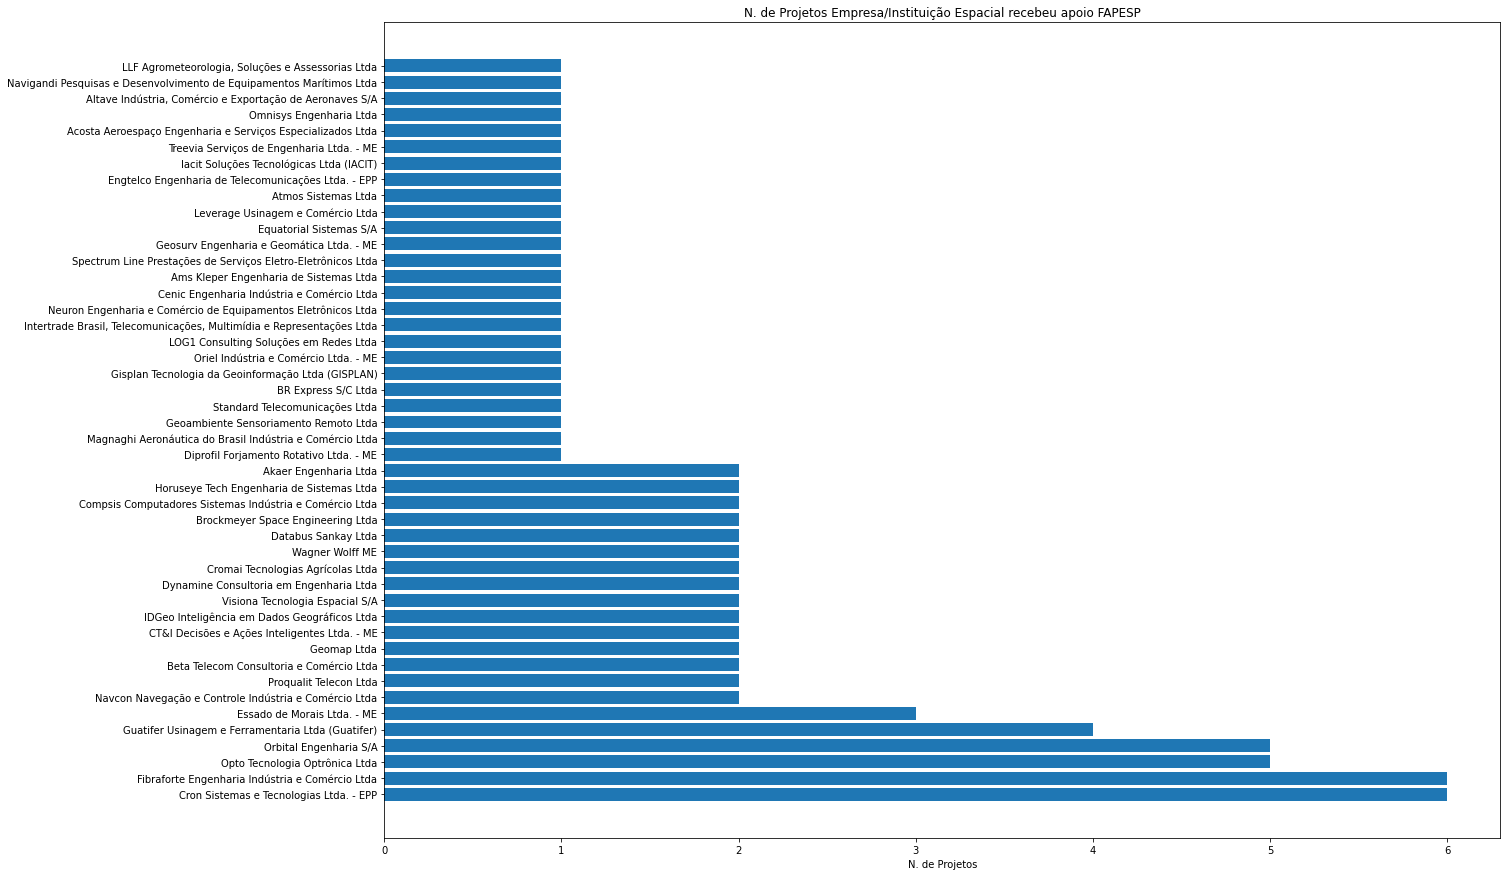

In [ ]:
#Gera um histograma do Número de Projetos que cada empresa realizou junto à FAPESP
n_projetos = dataframe_filtrado['Entidade'].value_counts()

plt.figure(figsize=(20,15))
plt.title('N. de Projetos Empresa/Instituição Espacial recebeu apoio FAPESP')
plt.barh(n_projetos.index,n_projetos) #width = 15, align='center')
plt.xlabel('N. de Projetos')
#plt.savefig('N. de Projetos de Empresas Espaciais que recebeream apoio FAPESP.png', format='png', orientation='landscape')
plt.show()

In [ ]:
dataframe_filtrado['Município'].value_counts()

São José dos Campos      39
São Paulo                 9
São Carlos                7
Franca                    2
Piracicaba                2
Guararema                 2
São Bernardo do Campo     1
Osasco                    1
Vinhedo                   1
Campinas                  1
São Lourenço da Serra     1
Santos                    1
Name: Município, dtype: int64

In [ ]:
dataframe_filtrado.columns

Index(['N. Processo', 'Título (Português)', 'Título (Inglês)', 'Beneficiário',
       'Instituição', 'Cidade Instituição', 'Instituição Parceira', 'Empresa',
       'Município', 'Pesquisador Responsável', 'Pesquisadores Principais',
       'Pesquisadores Associados', 'Supervisor', 'Local de Pesquisa',
       'Pesquisador Visitante', 'Instituição do Pesquisador Visitante',
       'Linha de Fomento', 'Grande Área do Conhecimento',
       'Área do Conhecimento', 'Subárea do Conhecimento', 'Assuntos',
       'Data de Início', 'Data de Término',
       'Acordo(s)/Convênio(s) de Cooperação com a FAPESP',
       'Instituições no Exterior', 'País (Instituições no Exterior)',
       'Pesquisador responsável no exterior', 'Resumo (Português)',
       'Resumo (Inglês)', 'Processos Vinculados', 'Unnamed: 30', 'Filtro',
       'Entidade'],
      dtype='object')

### Análise do Tempo de Cada Projeto

In [ ]:
import datetime as dt

In [ ]:
time_delta = dataframe_filtrado['Data de Término'] - dataframe_filtrado['Data de Início']
time_delta.describe()

count                             84
mean               705 days 02:00:00
std      462 days 23:47:21.659261880
min                180 days 00:00:00
25%                273 days 00:00:00
50%                729 days 00:00:00
75%                920 days 12:00:00
max               2617 days 00:00:00
dtype: object

In [ ]:
mes = dt.timedelta(days = 30)

time_delta / mes

0      9.066667
1      9.066667
2     24.300000
3      9.066667
4      9.066667
        ...    
79    65.900000
80    39.566667
81    87.233333
82    60.833333
83    44.600000
Length: 84, dtype: float64

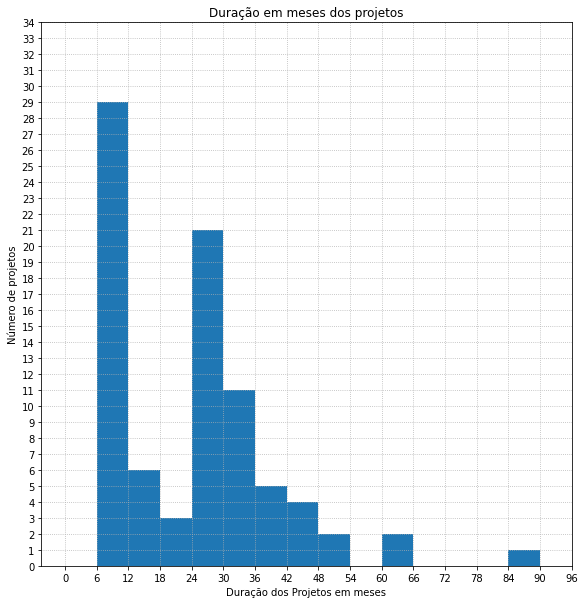

In [ ]:
#Gerando o histograma da duração dos projetos em meses

plt.figure(figsize=(9.5,10))
plt.hist(time_delta/mes, bins=[i*6 for i in range(16)])
plt.xticks([i for i in range(0,100, 6)])
plt.yticks(range(35))
plt.xlabel('Duração dos Projetos em meses')
plt.ylabel('Número de projetos')
plt.title('Duração em meses dos projetos')
plt.grid(axis='both', linestyle='dotted')
#plt.savefig('duracao_em_meses_projetos.png', format='png')
plt.show()

### Gerando Histograma do Ano de Início dos Projetos


In [ ]:
# Capturando todas as datas de início dos projetos e convertendo de formato datetime para int
data_inicio_lista = []
data_inicio = pd.Series(data_inicio_lista)

for i in range(dataframe_filtrado.shape[0]):
  data_inicio[i] = int(str(dataframe_filtrado['Data de Início'][i])[:4])

data_inicio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


0     2021
1     2021
2     2021
3     2020
4     2020
      ... 
79    1999
80    1999
81    1999
82    1998
83    1998
Length: 84, dtype: int64

In [ ]:
# Capturando a frequência de início de projetos por ano
x = data_inicio.value_counts()
x

2018    13
2017    12
2021    11
2016     6
2020     5
2005     4
2007     3
2019     3
2004     3
2001     3
1998     3
2000     3
1999     3
2010     2
2008     2
2003     2
2012     1
2009     1
2013     1
2011     1
2006     1
2002     1
dtype: int64

In [ ]:
# Adicionando 2015 e 2023 com frequência 0 para aparecer no gráfico gerado
x1 = pd.Series(x)
adendo = {2015:0, 2023:0, 2014:0, 2022:0}
adendo_plus = pd.Series(adendo)

x_anos = pd.concat([x1,adendo_plus])
x_anos

2018    13
2017    12
2021    11
2016     6
2020     5
2005     4
2007     3
2019     3
2004     3
2001     3
1998     3
2000     3
1999     3
2010     2
2008     2
2003     2
2012     1
2009     1
2013     1
2011     1
2006     1
2002     1
2015     0
2023     0
2014     0
2022     0
dtype: int64

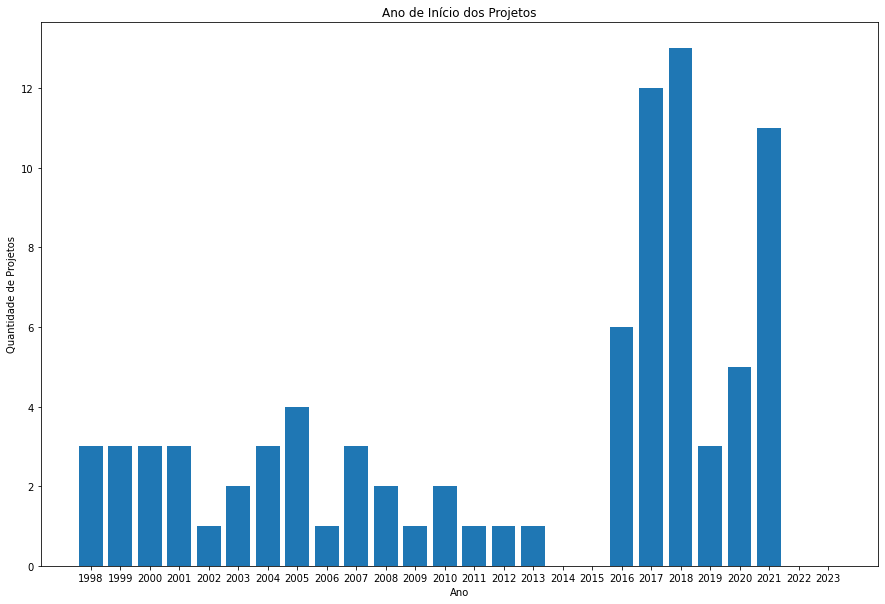

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(x_anos.index, x_anos)
plt.xticks(x_anos.index)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Projetos')
plt.title('Ano de Início dos Projetos')
#plt.savefig('Ano de Início dos Projetos.png', format='png')
plt.show()

### Gerando Histograma do Final dos Projetos

In [ ]:
# Capturando todas as datas de início dos projetos e convertendo de formato datetime para int
data_termino_lista = []
data_termino = pd.Series(data_termino_lista)

for i in range(dataframe_filtrado.shape[0]):
  data_termino[i] = int(str(dataframe_filtrado['Data de Término'][i])[:4])

data_termino

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


0     2022
1     2022
2     2023
3     2021
4     2021
      ... 
79    2005
80    2002
81    2006
82    2003
83    2001
Length: 84, dtype: int64

In [ ]:
# Capturando a frequência de início de projetos por ano
x_termino_incompleto = data_termino.value_counts()
x_termino_incompleto

2020    13
2022     9
2019     9
2021     6
2009     4
2004     4
2023     4
2008     4
2017     4
2012     3
2018     3
2007     3
2005     3
2003     3
2002     3
2011     2
2006     2
2001     2
2016     2
2014     1
dtype: int64

In [ ]:
# Adicionando 2015 e 2023 com frequência 0 para aparecer no gráfico gerado
x2 = pd.Series(x_termino_incompleto)
adendo = {1998:0, 1999:0, 2000:0, 2010:0, 2013:0, 2014:0}
adendo_plus = pd.Series(adendo)

x_termino_completo = pd.concat([x2,adendo_plus])
x_termino_completo

2020    13
2022     9
2019     9
2021     6
2009     4
2004     4
2023     4
2008     4
2017     4
2012     3
2018     3
2007     3
2005     3
2003     3
2002     3
2011     2
2006     2
2001     2
2016     2
2014     1
1998     0
1999     0
2000     0
2010     0
2013     0
2014     0
dtype: int64

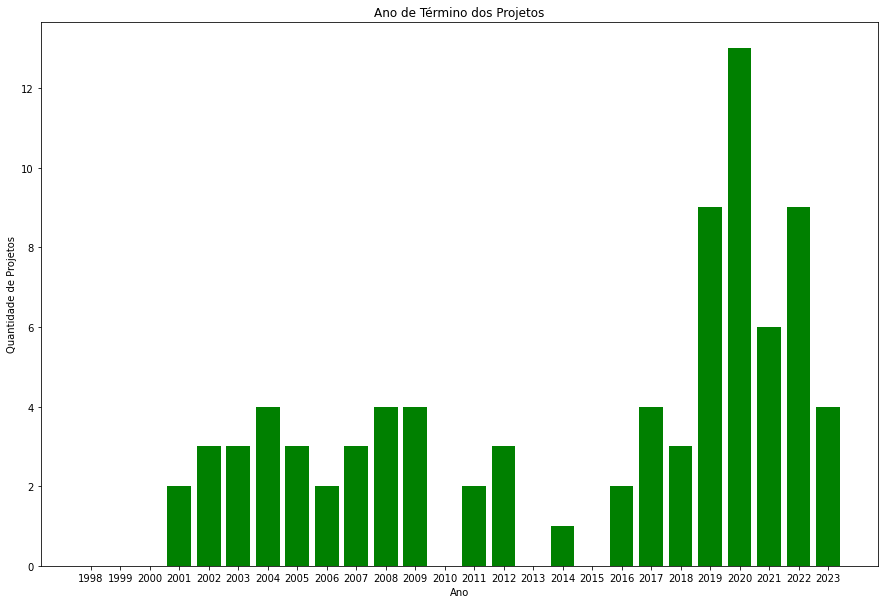

In [ ]:
# Gráfico gerado do ano de Início dos projetos

plt.figure(figsize=(15,10))
plt.bar(x_termino_completo.index, x_termino_completo, color='green')
plt.xticks(x_anos.index)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Projetos')
plt.title('Ano de Término dos Projetos')
#plt.savefig('Ano de Término dos Projetos.png', format='png')
plt.show()

### Plotando os dois histogramas juntos

In [ ]:
x_termino_completo = x_termino_completo.sort_index()
x_termino_completo

1998     0
1999     0
2000     0
2001     2
2002     3
2003     3
2004     4
2005     3
2006     2
2007     3
2008     4
2009     4
2010     0
2011     2
2012     3
2013     0
2014     1
2014     0
2016     2
2017     4
2018     3
2019     9
2020    13
2021     6
2022     9
2023     4
dtype: int64

In [ ]:
x_anos = x_anos.sort_index()
x_anos

1998     3
1999     3
2000     3
2001     3
2002     1
2003     2
2004     3
2005     4
2006     1
2007     3
2008     2
2009     1
2010     2
2011     1
2012     1
2013     1
2014     0
2015     0
2016     6
2017    12
2018    13
2019     3
2020     5
2021    11
2022     0
2023     0
dtype: int64

In [ ]:
x_termino_completo.shape

(26,)

In [ ]:
x_anos.shape

(26,)

<function matplotlib.pyplot.show>

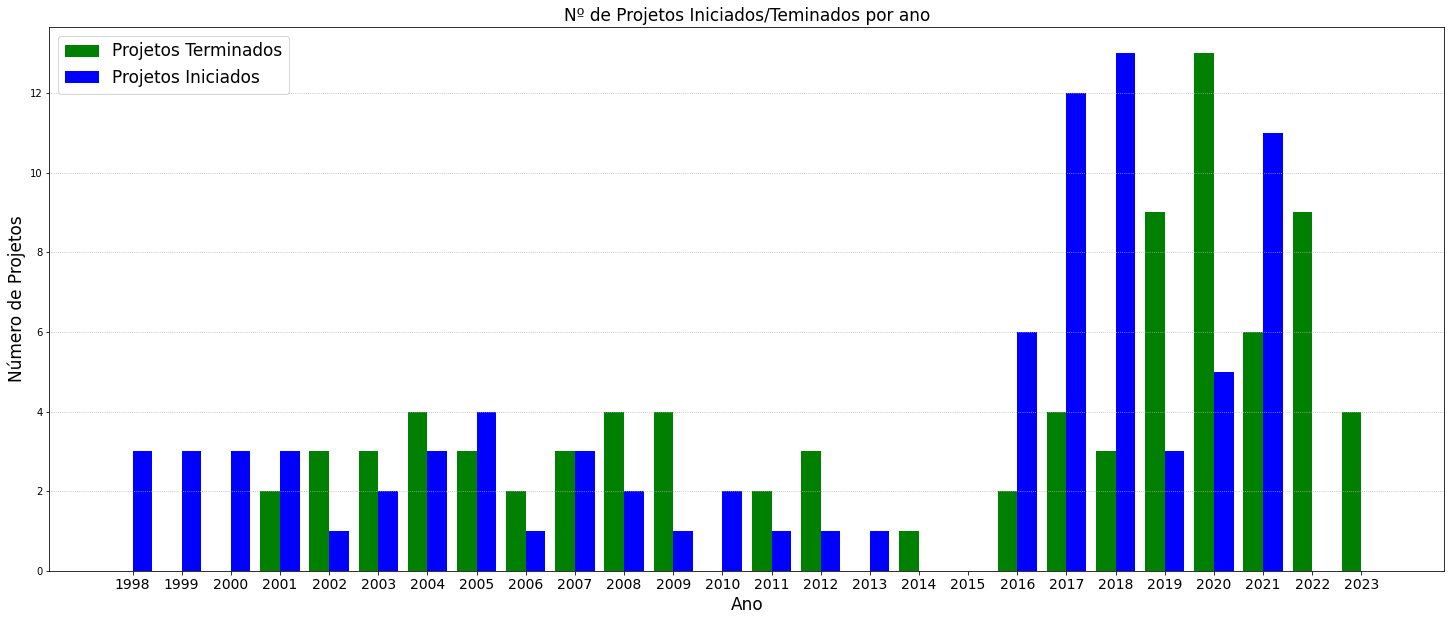

In [ ]:
X = np.arange(len(x_termino_completo))

largura_barra = 0.40

plt.figure(figsize=(25,10))
plt.bar(X, x_termino_completo, color='green', label = 'Projetos Terminados', width = largura_barra)
plt.bar(X + largura_barra, x_anos, color = 'blue',label = 'Projetos Iniciados', width = largura_barra)

plt.xticks([(i - largura_barra/2) + largura_barra for i in range(26)],[i for i in range(1998, 2024)], fontsize=14)

plt.xlabel('Ano', fontsize=17)
plt.ylabel('Número de Projetos', fontsize=17)
plt.legend(fontsize=17)
plt.grid(axis='y', linestyle='dotted')
plt.title('Nº de Projetos Iniciados/Teminados por ano', fontsize=17)
plt.savefig('Nº de Projetos Iniciados e Teminados por ano.png', format='png', bbox_inches='tight')

plt.show

###Plotando um histograma diferenciando as parcerias de cada projeto


In [ ]:
# Projetos que tiveram alguma parceria/acordo com a fapesp
projetos_com_parceria = dataframe_filtrado[dataframe_filtrado.notnull()['Acordo(s)/Convênio(s) de Cooperação com a FAPESP']]
projetos_com_parceria.index = range(projetos_com_parceria.shape[0])
projetos_com_parceria['Acordo(s)/Convênio(s) de Cooperação com a FAPESP'].value_counts().index

Index(['FINEP - PIPE/PAPPE Subvenção', 'FINEP - PAPPE-PIPE III',
       'Programa FINEP – TECNOVA II', 'National Research Council of Canada',
       'MCTI/MC', 'ISTP Canada'],
      dtype='object')

In [ ]:
projetos_com_parceria[['Acordo(s)/Convênio(s) de Cooperação com a FAPESP','Data de Início','Data de Término']]

,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Data de Início,Data de Término
0,MCTI/MC,2021-03-01,2023-02-28
1,FINEP - PIPE/PAPPE Subvenção,2018-08-01,2020-10-31
2,FINEP - PIPE/PAPPE Subvenção,2018-07-01,2020-06-30
3,FINEP - PIPE/PAPPE Subvenção,2018-06-01,2020-08-31
4,FINEP - PIPE/PAPPE Subvenção,2018-06-01,2020-08-31
5,FINEP - PIPE/PAPPE Subvenção,2018-06-01,2020-09-30
6,FINEP - PIPE/PAPPE Subvenção,2017-11-01,2019-10-31
7,FINEP - PIPE/PAPPE Subvenção,2017-11-01,2020-10-31
8,FINEP - PIPE/PAPPE Subvenção,2017-09-01,2019-02-28
9,FINEP - PIPE/PAPPE Subvenção,2017-06-01,2020-03-31


In [ ]:
frequencia_por_ano_inicio = pd.DataFrame(0, index=range(1998,2024),columns=projetos_com_parceria['Acordo(s)/Convênio(s) de Cooperação com a FAPESP'].value_counts().index)
frequencia_por_ano_inicio['PIPE/FAPESP'] = 0

frequencia_por_ano_inicio

,FINEP - PIPE/PAPPE Subvenção,FINEP - PAPPE-PIPE III,Programa FINEP – TECNOVA II,National Research Council of Canada,MCTI/MC,ISTP Canada,PIPE/FAPESP
1998,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0
2000,0,0,0,0,0,0,0
2001,0,0,0,0,0,0,0
2002,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,0
2004,0,0,0,0,0,0,0
2005,0,0,0,0,0,0,0
2006,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0


In [ ]:
for i in range(dataframe_filtrado.shape[0]):
  index_ano = float(str(dataframe_filtrado['Data de Início'][i])[:4])
  coluna = dataframe_filtrado['Acordo(s)/Convênio(s) de Cooperação com a FAPESP'][i]
  if pd.isna(coluna):
    frequencia_por_ano_inicio['PIPE/FAPESP'][index_ano] += 1
  else:
    frequencia_por_ano_inicio[coluna][index_ano] += 1

In [ ]:
 frequencia_por_ano_inicio = frequencia_por_ano_inicio[['PIPE/FAPESP','FINEP - PIPE/PAPPE Subvenção','FINEP - PAPPE-PIPE III', 'Programa FINEP – TECNOVA II','National Research Council of Canada', 'MCTI/MC', 'ISTP Canada']]
 frequencia_por_ano_inicio

,PIPE/FAPESP,FINEP - PIPE/PAPPE Subvenção,FINEP - PAPPE-PIPE III,Programa FINEP – TECNOVA II,National Research Council of Canada,MCTI/MC,ISTP Canada
1998,3,0,0,0,0,0,0
1999,3,0,0,0,0,0,0
2000,3,0,0,0,0,0,0
2001,3,0,0,0,0,0,0
2002,1,0,0,0,0,0,0
2003,2,0,0,0,0,0,0
2004,3,0,0,0,0,0,0
2005,2,0,2,0,0,0,0
2006,1,0,0,0,0,0,0
2007,3,0,0,0,0,0,0


<Figure size 1440x1080 with 0 Axes>

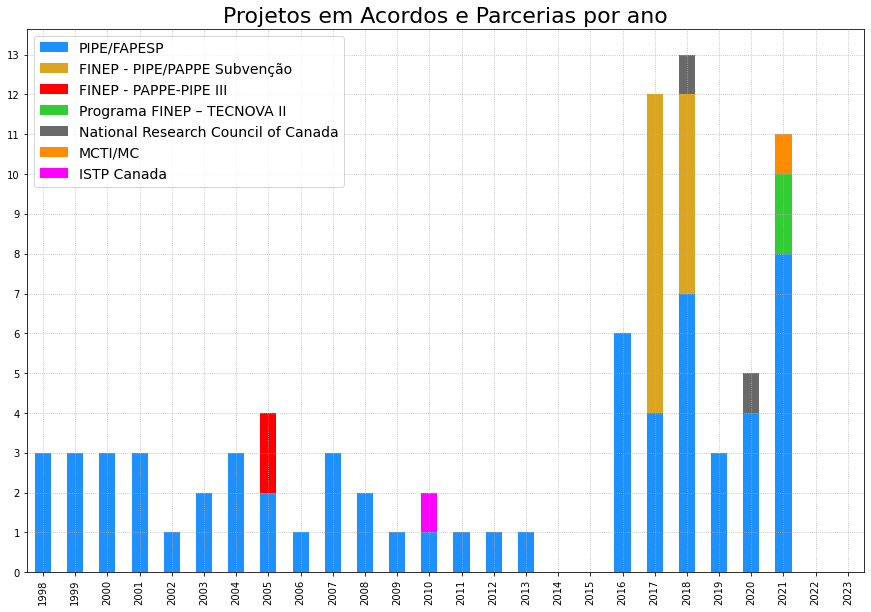

In [ ]:
cores = {'PIPE/FAPESP':'DodgerBlue','FINEP - PIPE/PAPPE Subvenção':'Goldenrod','FINEP - PAPPE-PIPE III': 'red',	'Programa FINEP – TECNOVA II': 'LimeGreen',	'National Research Council of Canada': 'DimGray',	'MCTI/MC': 'DarkOrange' ,'ISTP Canada':'Magenta'}

plt.figure(figsize=(20,15))
frequencia_por_ano_inicio.plot.bar(stacked=True,figsize=(15,10), color=cores, grid='True', linestyle='dotted')
plt.grid(linestyle='dotted')
plt.title('Projetos em Acordos e Parcerias por ano', fontsize=22)
plt.yticks(range(14))
plt.legend(fontsize=14)
plt.savefig('projetos_em_acordos_parcerias_por_ano.png', format='png')
plt.show()

### Nº Projetos/Ano de cada empresa (Substituído)

In [ ]:
dataframe_filtrado[dataframe_filtrado['Entidade'] == 'Fibraforte Engenharia Indústria e Comércio Ltda'][['Data de Início', 'Data de Término']]

,Data de Início,Data de Término
13,2018-06-01,2020-08-31
14,2018-06-01,2020-08-31
15,2018-06-01,2020-09-30
35,2004-10-01,2005-09-30
37,2004-04-01,2006-10-31
77,2000-03-01,2002-12-31


In [ ]:
# Criando a Series que vai guardar a informação final do número de projetos por ano de cada empresa
n_projetos_por_ano_por_empresa = pd.Series(index = dataframe_filtrado['Entidade'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
# Calculando o número médio de projetos por ano por empresa
for i in dataframe_filtrado['Entidade'].unique():
  empresa = dataframe_filtrado[dataframe_filtrado['Entidade'] == i]
  empresa.index = range(empresa.shape[0])
  td_empresa = empresa['Data de Término'][0] - empresa['Data de Início'][empresa.shape[0]-1]
  anos_financiada = (float(str(td_empresa)[:4])/30)/12
  projetos_por_ano = dataframe_filtrado[dataframe_filtrado['Entidade'] == i]['Entidade'].value_counts()[i] / anos_financiada                                                                     
  n_projetos_por_ano_por_empresa[i] = projetos_por_ano

n_projetos_por_ano_por_empresa


Cron Sistemas e Tecnologias Ltda. - EPP                                  1.615557
Fibraforte Engenharia Indústria e Comércio Ltda                          0.288462
Opto Tecnologia Optrônica Ltda                                           1.444623
Orbital Engenharia S/A                                                   0.273848
Guatifer Usinagem e Ferramentaria Ltda (Guatifer)                        0.966443
Essado de Morais Ltda. - ME                                              0.826320
Navcon Navegação e Controle Indústria e Comércio Ltda                    0.307298
Proqualit Telecon Ltda                                                   0.207553
Beta Telecom Consultoria e Comércio Ltda                                 0.155642
Geomap Ltda                                                              2.637363
CT&I Decisões e Ações Inteligentes Ltda. - ME                            2.637363
IDGeo Inteligência em Dados Geográficos Ltda                             2.647059
Visiona Tecnolog

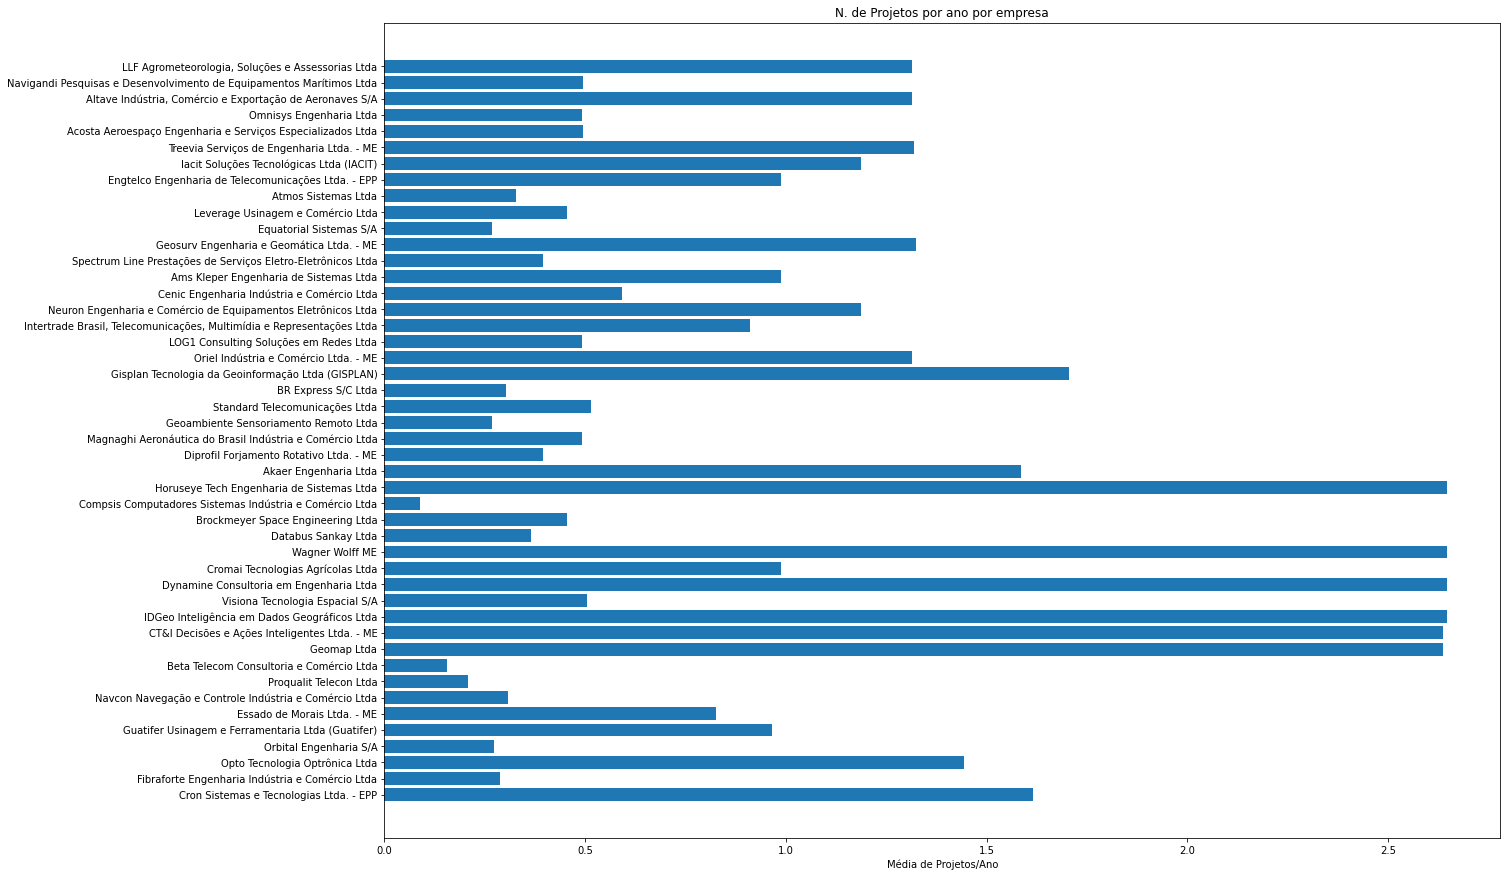

In [ ]:
# Plotando o gráfico dessa grnadeza
plt.figure(figsize=(20,15))
plt.title('N. de Projetos por ano por empresa')
plt.barh(n_projetos_por_ano_por_empresa.index,n_projetos_por_ano_por_empresa) #width = 15, align='center')
plt.xlabel('Média de Projetos/Ano')
#plt.savefig('N. de Projetos de Empresas Espaciais que recebeream apoio FAPESP.png', format='png', orientation='landscape')
plt.show()

In [ ]:
n_projetos_por_ano_por_empresa.sort_index()
n_projetos.sort_index()

Acosta Aeroespaço Engenharia e Serviços Especializados Ltda              1
Akaer Engenharia Ltda                                                    2
Altave Indústria, Comércio e Exportação de Aeronaves S/A                 1
Ams Kleper Engenharia de Sistemas Ltda                                   1
Atmos Sistemas Ltda                                                      1
BR Express S/C Ltda                                                      1
Beta Telecom Consultoria e Comércio Ltda                                 2
Brockmeyer Space Engineering Ltda                                        2
CT&I Decisões e Ações Inteligentes Ltda. - ME                            2
Cenic Engenharia Indústria e Comércio Ltda                               1
Compsis Computadores Sistemas Indústria e Comércio Ltda                  2
Cromai Tecnologias Agrícolas Ltda                                        2
Cron Sistemas e Tecnologias Ltda. - EPP                                  6
Databus Sankay Ltda      

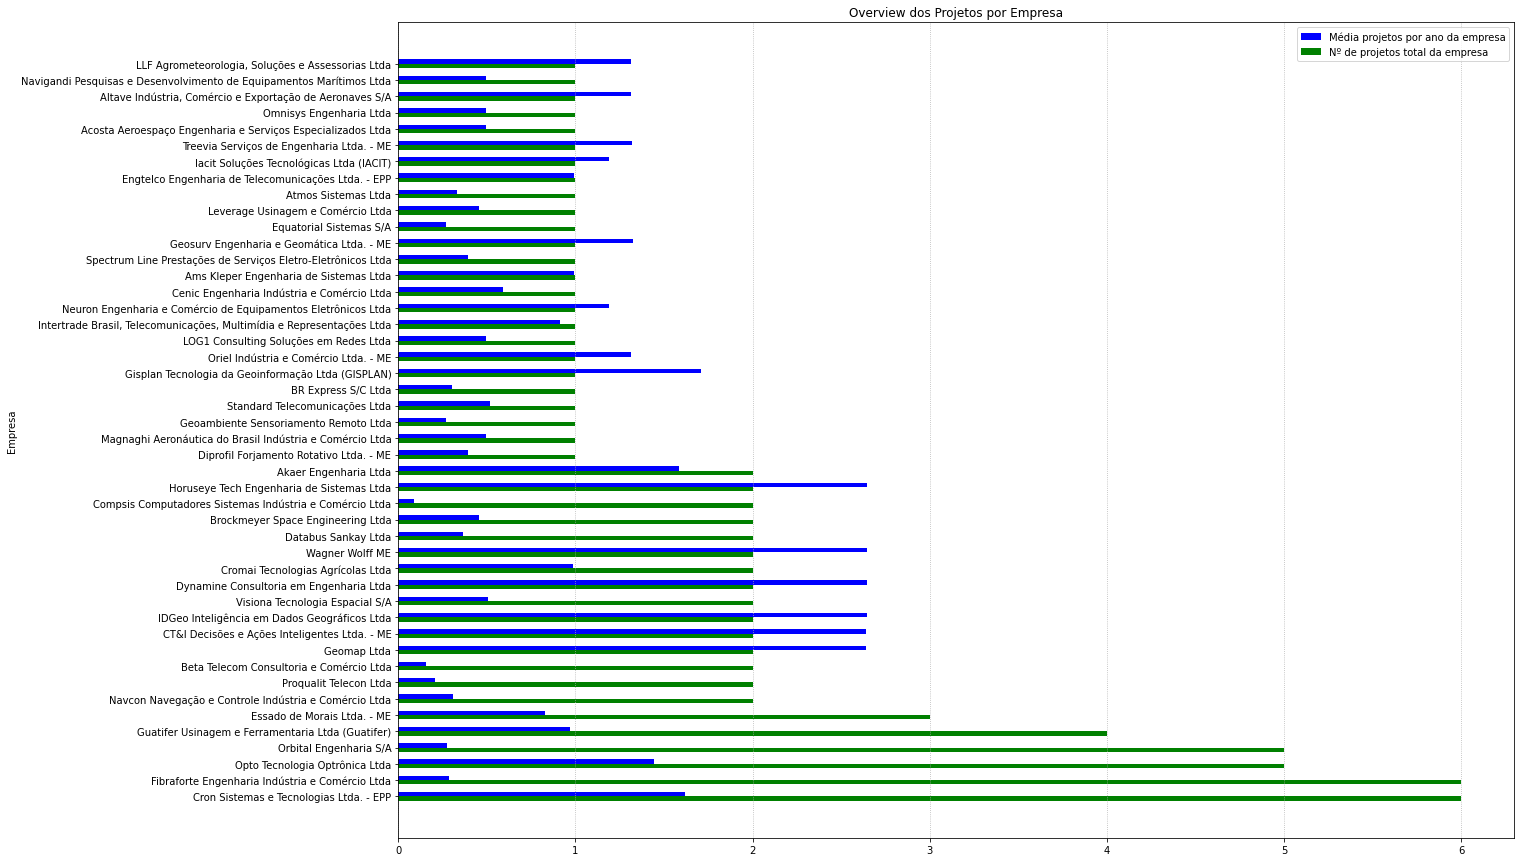

In [ ]:
#Gerando o Gráfico

Y = np.arange(len(n_projetos.index))
largura_barra = 0.4

Y0 = [i for i in range(3*len(n_projetos.index)) if i%3 == 0]
Y1 = [i + largura_barra for i in range(3*len(n_projetos.index)) if i%3 == 0]
Y2 = [i - largura_barra for i in range(3*len(n_projetos.index)) if i%3 == 0]

plt.figure(figsize=(20,15))
plt.barh(Y1, n_projetos_por_ano_por_empresa, color='blue', label = 'Média projetos por ano da empresa')
plt.barh(Y2, n_projetos, color = 'green',label = 'Nº de projetos total da empresa')

plt.yticks(Y0,n_projetos.index)

plt.xlabel('')
plt.ylabel('Empresa')
plt.legend()
plt.title('Overview dos Projetos por Empresa')
plt.grid(axis='x', linestyle='dotted')
plt.savefig('overview_dos_projetos_por_empresa.png', format='png', orientation='landscape')
plt.show()

### Gráfico de Pizza c/ Projetos por Empresa


In [ ]:
dataframe_filtrado['Entidade'].value_counts().value_counts()

1    25
2    15
6     2
5     2
4     1
3     1
Name: Entidade, dtype: int64

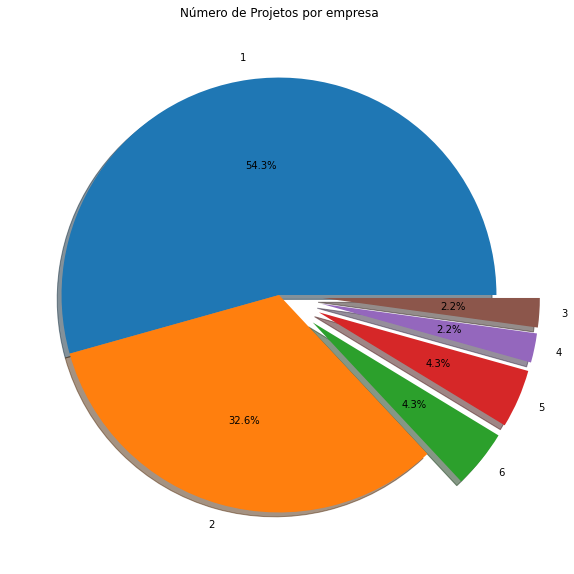

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(dataframe_filtrado['Entidade'].value_counts().value_counts(), labels = dataframe_filtrado['Entidade'].value_counts().value_counts().index, explode=[0,0,0.2,0.2,0.2,0.2], autopct='%1.1f%%', shadow=True)
plt.title('Número de Projetos por empresa')
#plt.legend(['1 Projeto', '2 projetos','3 projetos','4 projetos','5 projetos','6 projetos'])
#plt.savefig('grafico_pizza_numero_projetos_por_empresa.png', format='png')
plt.show()

### Gráfico de Pizza com as áreas de conhecimento

In [ ]:
areas_conhecimento = dataframe_filtrado['Área do Conhecimento'].value_counts()
areas_conhecimento
#areas_conhecimento_str = []
#for i in range(areas_conhecimento.shape[0]):
#  areas_conhecimento_str.append(str(areas_conhecimento.values[i]))

#areas_conhecimento_str

Engenharia Aeroespacial                       42
Engenharia Elétrica                           11
Geociências                                    5
Ciência da Computação                          4
Engenharia de Produção                         3
Engenharia Agrícola                            2
Engenharia de Minas                            2
Recursos Florestais e Engenharia Florestal     2
Física                                         2
Engenharia Mecânica                            2
Agronomia                                      2
Engenharia Naval e Oceânica                    1
Administração                                  1
Engenharia de Materiais e Metalúrgica          1
Engenharia de Transportes                      1
Engenharia Civil                               1
Name: Área do Conhecimento, dtype: int64

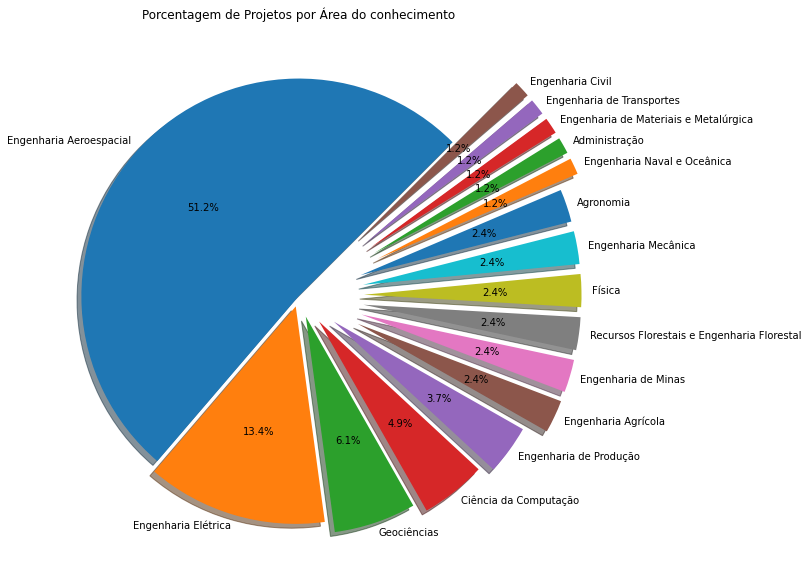

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(areas_conhecimento, labels = areas_conhecimento.index, explode=[0,0.05,0.1,0.15,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4], autopct='%1.1f%%', shadow=True, labeldistance=1.05, startangle=45)
plt.title('Porcentagem de Projetos por Área do conhecimento')
#plt.legend(['1 Projeto', '2 projetos','3 projetos','4 projetos','5 projetos','6 projetos'])
plt.savefig('grafico_pizza_numero_projetos_por_empresa.png', format='png', orientation='landscape')
plt.show()

### Duração de cada projeto com divisão por épocas


In [ ]:
[f'{i*6}-{i*6+6}' for i in range(16)]

['0-6',
 '6-12',
 '12-18',
 '18-24',
 '24-30',
 '30-36',
 '36-42',
 '42-48',
 '48-54',
 '54-60',
 '60-66',
 '66-72',
 '72-78',
 '78-84',
 '84-90',
 '90-96']

In [ ]:
duracao_projetos_divisao_epocas = pd.DataFrame(0,index=[f'{i*6}-{i*6+6}' for i in range(16)], columns=['1998-2003','2004-2009','2010-2015','2015-2021'])
mes = dt.timedelta(days = 30)
duracao_projetos_divisao_epocas

,1998-2003,2004-2009,2010-2015,2015-2021
0-6,0,0,0,0
6-12,0,0,0,0
12-18,0,0,0,0
18-24,0,0,0,0
24-30,0,0,0,0
30-36,0,0,0,0
36-42,0,0,0,0
42-48,0,0,0,0
48-54,0,0,0,0
54-60,0,0,0,0


In [ ]:
dataframe_filtrado.iloc[[35,36,37],:][['Data de Início', 'Data de Término']]

,Data de Início,Data de Término
35,2004-10-01,2005-09-30
36,2004-10-01,2007-03-31
37,2004-04-01,2006-10-31


In [ ]:
for i in range(dataframe_filtrado.shape[0]):
  ano_inicio = int(str(dataframe_filtrado['Data de Início'][i])[:4])
  duracao_meses = (dataframe_filtrado['Data de Término'][i] - dataframe_filtrado['Data de Início'][i]) / mes
  for linha in duracao_projetos_divisao_epocas.index:
    if linha == '0-6':
      if (duracao_meses > 0) & (duracao_meses <= 6):
        for coluna in duracao_projetos_divisao_epocas.columns:
          if (ano_inicio >= float(coluna[:4])) & (ano_inicio <= float(coluna[5:9])):
            duracao_projetos_divisao_epocas[coluna][linha] +=1
            print(i)
    elif linha == '6-12':
      if (duracao_meses > 6) & (duracao_meses <= 12):
        for coluna in duracao_projetos_divisao_epocas.columns:
          if (ano_inicio >= float(coluna[:4])) & (ano_inicio <= float(coluna[5:9])):
            duracao_projetos_divisao_epocas[coluna][linha] +=1
            print(i)
    else:
      if (duracao_meses > float(linha[:2])) & (duracao_meses <= float(linha[3:5])):
        for coluna in duracao_projetos_divisao_epocas.columns:
          if (ano_inicio >= float(coluna[:4])) & (ano_inicio <= float(coluna[5:9])):
            duracao_projetos_divisao_epocas[coluna][linha] +=1
            print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


In [ ]:
duracao_projetos_divisao_epocas.sum().sum()

84

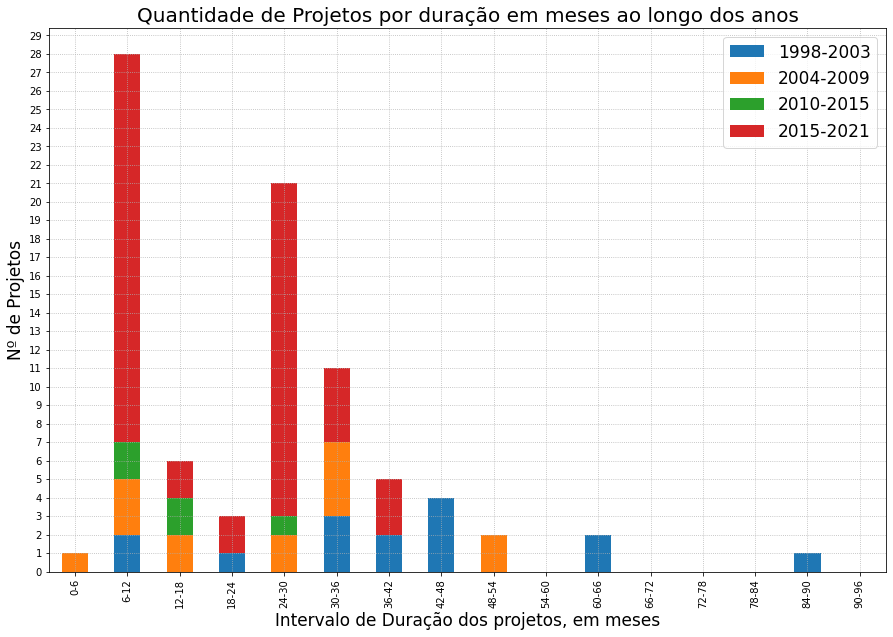

In [ ]:
duracao_projetos_divisao_epocas.plot.bar(stacked=True,figsize=(15,10), grid=True, linestyle='dotted')
plt.yticks(range(30))
plt.grid(linestyle='dotted')
plt.xlabel('Intervalo de Duração dos projetos, em meses', fontsize=17)
plt.ylabel('Nº de Projetos', fontsize=17)
plt.title('Quantidade de Projetos por duração em meses ao longo dos anos', fontsize=20)
plt.legend(fontsize=17)
plt.savefig('quantidade_projeto_duraçao_meses_ao_longo_dos_anos.png', format='png', bbox_inches='tight')
plt.show()


### Tempo médio de Duração dos Projetos Iniciados por ano

In [ ]:
mes = dt.timedelta(days = 30)
dataframe_filtrado[['Data de Início', 'Data de Término']]

,Data de Início,Data de Término
0,2021-06-01,2022-02-28
1,2021-06-01,2022-02-28
2,2021-03-01,2023-02-28
3,2020-10-01,2021-06-30
4,2020-10-01,2021-06-30
...,...,...
79,1999-10-01,2005-02-28
80,1999-10-01,2002-12-31
81,1999-10-01,2006-11-30
82,1998-06-01,2003-05-31


In [ ]:
media_duracao_projetos_por_ano = pd.Series(float(0), index=x_anos.index)       # Series vazia com os anos dos projetos
duracao_total = 0                                                              # Variável que vai registrar a soma das durações de cada ano
dataframe_filtrado_sortido_inicio = dataframe_filtrado.sort_values(by='Data de Início')       # Ordenando o DataFrame em ordem crescente de início (De 1998 -> 2021)
dataframe_filtrado_sortido_inicio.index = range(dataframe_filtrado_sortido_inicio.shape[0])   # Renomeando os índices do novo dataframe ordenado

# Vale dizer que o loop a seguir vai passar uma vez só no dataframe.


for i in range(dataframe_filtrado_sortido_inicio.shape[0]):                                   # vai passar por todo o dataframe
  ano = int(str(dataframe_filtrado_sortido_inicio['Data de Início'][i])[:4])                  # pega o ano de início do projeto
  if ano < 2021:                                                                              # compara para ver se é de antes de 2021, 2021 vai ter um tratamento especial
    ano_projeto_seguinte = int(str(dataframe_filtrado_sortido_inicio['Data de Início'][i+1])[:4]) # captura o ano do projeto seguinte
    if (x_anos[ano] != 0) & (x_anos[ano] > 1):                                                # confere se no ano teve projeto E se teve mais de 1 / Pra um mesmo ano, sempre tem que entrar no laço ou não
      if ano == ano_projeto_seguinte:                                                         # Checa se o projeto 'i' é o último do seu ano. Entra na condição se NÃO FOR
        duracao_total += ((dataframe_filtrado_sortido_inicio['Data de Término'][i] - dataframe_filtrado_sortido_inicio['Data de Início'][i]) / mes)    # Se o projeto i NÃO for o último, soma a sua duração a variável que controla a soma das durações dos projetos que começaram em um mesmo ano
      else:                                                                                   # Caso o projeto 'i' SEJA o último do seu ano
        duracao_total += ((dataframe_filtrado_sortido_inicio['Data de Término'][i] - dataframe_filtrado_sortido_inicio['Data de Início'][i]) / mes) # A duração do projeto i será somada
        media_duracao_projetos_por_ano[ano] = duracao_total / float(x_anos[ano])              # Média de Duração dos projetos iniciados em cada ano é calculada 
        duracao_total = 0                                                                     # Reinicializa a variável que registra a soma das durações de cada ano
    elif (x_anos[ano] == 1):                                                                  # Confere se no ano só houve 1 projeto
      media_duracao_projetos_por_ano[ano] = (dataframe_filtrado_sortido_inicio['Data de Término'][i] - dataframe_filtrado_sortido_inicio['Data de Início'][i]) / mes # Coloca a duração média do ano como a duração do único projeto que foi iniciado
  else:                                                                                       # Tratamento especial para 2021, pois a estratégia de pegar o ano de i e de i+1 não funciona no último índice no dataframe (não existe i+1 para o último índice) 
    duracao_total += ((dataframe_filtrado_sortido_inicio['Data de Término'][i] - dataframe_filtrado_sortido_inicio['Data de Início'][i]) / mes)       # Basta realizar a mesma conta que já vinha sendo realizada
    if i == 83:
      duracao_total += ((dataframe_filtrado_sortido_inicio['Data de Término'][i] - dataframe_filtrado_sortido_inicio['Data de Início'][i]) / mes)
      media_duracao_projetos_por_ano[ano] = duracao_total / float(x_anos[ano])


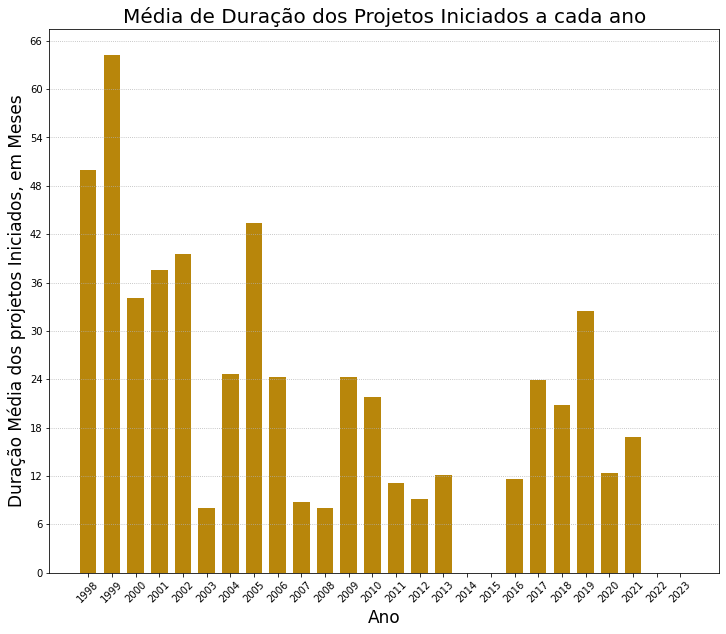

In [ ]:
# Plotagem do gráfico 

X = [i*5 for i in range(1, 27)]

plt.figure(figsize=(12,10))
plt.bar(X, media_duracao_projetos_por_ano, align='center', width=3.5, color='DarkGoldenrod')
plt.xticks(X, labels=media_duracao_projetos_por_ano.index, rotation=45)
plt.yticks([i*6 for i in range((12))])
plt.grid(axis='y', linestyle='dotted')
plt.xlabel('Ano', fontsize=17)
plt.ylabel('Duração Média dos projetos Iniciados, em Meses', fontsize=17)
plt.title('Média de Duração dos Projetos Iniciados a cada ano', fontsize=20)
plt.savefig('media_duracao_projetos_iniciados_cada_ano.png',format='png')
plt.show()

### Índice de Simultaneidade/Hiato em projetos PIPE

In [ ]:
# Resgatando o número de projetos
n_projetos = n_projetos.sort_index()

In [ ]:
# Definindo o tempo de atuação total das empresas
tempo_de_atuação = dataframe_filtrado.groupby('Entidade')['Data de Término'].max() - dataframe_filtrado.groupby('Entidade')['Data de Início'].min()
tempo_de_atuação

Entidade
Acosta Aeroespaço Engenharia e Serviços Especializados Ltda              729 days
Akaer Engenharia Ltda                                                    911 days
Altave Indústria, Comércio e Exportação de Aeronaves S/A                 274 days
Ams Kleper Engenharia de Sistemas Ltda                                   364 days
Atmos Sistemas Ltda                                                     1095 days
BR Express S/C Ltda                                                     1187 days
Beta Telecom Consultoria e Comércio Ltda                                4626 days
Brockmeyer Space Engineering Ltda                                       1583 days
CT&I Decisões e Ações Inteligentes Ltda. - ME                            303 days
Cenic Engenharia Indústria e Comércio Ltda                               608 days
Compsis Computadores Sistemas Indústria e Comércio Ltda                 8125 days
Cromai Tecnologias Agrícolas Ltda                                        729 days
Cron Si

In [ ]:
# Criando uma series para guardar o tempo em projetos
tempo_em_projetos = pd.Series(0, index=n_projetos.index)

In [ ]:
# Calculando o somatório do tempo total de cada empresa fazendo projetos
for i in n_projetos.index:
  projetos_da_empresa = dataframe_filtrado.loc[dataframe_filtrado['Entidade']==i]
  tp = dt.timedelta(0)
  for j, valor in projetos_da_empresa.iterrows():
    duracao_do_projeto = projetos_da_empresa['Data de Término'][j] - projetos_da_empresa['Data de Início'][j]
    tp += duracao_do_projeto
    #print(f"o tempo no projeto {j} foi de {duracao_do_projeto} dias, com data de início em {valor['Data de Início']} e témino em {valor['Data de Término']}")
  #print(f'TOTAL DE TEMPO em projetos da empresa {i} é de {tp} \n')
  tempo_em_projetos[i] = tp


tempo_em_projetos

Acosta Aeroespaço Engenharia e Serviços Especializados Ltda               729 days 00:00:00
Akaer Engenharia Ltda                                                    1365 days 00:00:00
Altave Indústria, Comércio e Exportação de Aeronaves S/A                  274 days 00:00:00
Ams Kleper Engenharia de Sistemas Ltda                                    364 days 00:00:00
Atmos Sistemas Ltda                                                      1095 days 00:00:00
BR Express S/C Ltda                                                      1187 days 00:00:00
Beta Telecom Consultoria e Comércio Ltda                                 2952 days 00:00:00
Brockmeyer Space Engineering Ltda                                        3166 days 00:00:00
CT&I Decisões e Ações Inteligentes Ltda. - ME                             576 days 00:00:00
Cenic Engenharia Indústria e Comércio Ltda                                608 days 00:00:00
Compsis Computadores Sistemas Indústria e Comércio Ltda                  2372 da

In [ ]:
# Calculando o índice de inovação
indice_de_inovacao = tempo_em_projetos / tempo_de_atuação

In [ ]:
# Retirando da análise as empresas que só tem 1 projeto
selecao = n_projetos != 1
indice_de_inovacao_sem_projetos_unicos = indice_de_inovacao[selecao].round(3)
indice_de_inovacao_sem_projetos_unicos

Akaer Engenharia Ltda                                      1.498
Beta Telecom Consultoria e Comércio Ltda                   0.638
Brockmeyer Space Engineering Ltda                          2.000
CT&I Decisões e Ações Inteligentes Ltda. - ME              1.901
Compsis Computadores Sistemas Indústria e Comércio Ltda    0.292
Cromai Tecnologias Agrícolas Ltda                          2.000
Cron Sistemas e Tecnologias Ltda. - EPP                    2.248
Databus Sankay Ltda                                        1.600
Dynamine Consultoria em Engenharia Ltda                    2.000
Essado de Morais Ltda. - ME                                1.045
Fibraforte Engenharia Indústria e Comércio Ltda            0.644
Geomap Ltda                                                2.000
Guatifer Usinagem e Ferramentaria Ltda (Guatifer)          1.079
Horuseye Tech Engenharia de Sistemas Ltda                  2.000
IDGeo Inteligência em Dados Geográficos Ltda               2.000
Navcon Navegação e Contro

In [ ]:
selecao_sortida = n_projetos[n_projetos.sort_values() != 1]
selecao_sortida = selecao_sortida.sort_values()
selecao_sortida = selecao_sortida.index
#selecao_sortida

In [ ]:
n_projetos[n_projetos.sort_values() != 1].sort_values()

Akaer Engenharia Ltda                                      2
Proqualit Telecon Ltda                                     2
Navcon Navegação e Controle Indústria e Comércio Ltda      2
IDGeo Inteligência em Dados Geográficos Ltda               2
Horuseye Tech Engenharia de Sistemas Ltda                  2
Geomap Ltda                                                2
Visiona Tecnologia Espacial S/A                            2
Dynamine Consultoria em Engenharia Ltda                    2
Wagner Wolff ME                                            2
Cromai Tecnologias Agrícolas Ltda                          2
Compsis Computadores Sistemas Indústria e Comércio Ltda    2
CT&I Decisões e Ações Inteligentes Ltda. - ME              2
Brockmeyer Space Engineering Ltda                          2
Beta Telecom Consultoria e Comércio Ltda                   2
Databus Sankay Ltda                                        2
Essado de Morais Ltda. - ME                                3
Guatifer Usinagem e Ferr

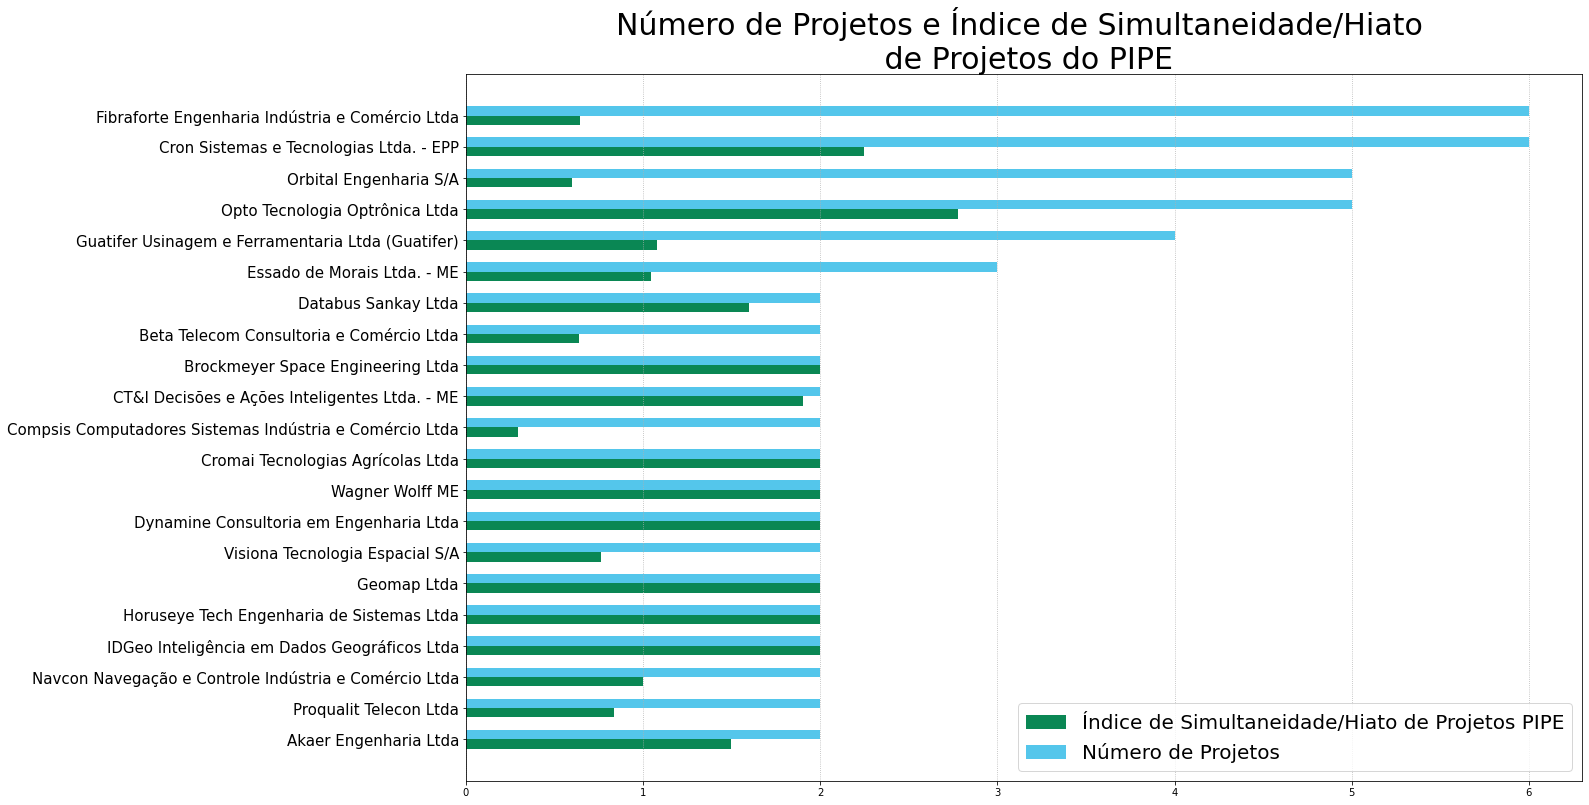

In [ ]:
# Plotando o gráfico
indice_de_inovacao_sem_projetos_unicos.reindex(selecao_sortida)
selecao = n_projetos.sort_values() != 1

altura_barra = 1.5

Y_grafico = [i*5 for i in range(indice_de_inovacao_sem_projetos_unicos.shape[0])]
Y_grafico1 = [i*5 - (altura_barra/2) for i in range(indice_de_inovacao_sem_projetos_unicos.shape[0])]
Y_grafico2 = [i*5 + (altura_barra/2) for i in range(n_projetos[selecao].shape[0])]

plt.figure(figsize=(20,13))
plt.barh(Y_grafico1, indice_de_inovacao_sem_projetos_unicos.reindex(selecao_sortida), height=altura_barra, color='#0A8754')
plt.barh(Y_grafico2, n_projetos[selecao].sort_values(), height=altura_barra, color='#54C6EB')
plt.yticks(Y_grafico, labels=indice_de_inovacao_sem_projetos_unicos.reindex(selecao_sortida).index, fontsize=15)
plt.grid(axis='x', linestyle='dotted')
#plt.legend(handles = ['#052F5F', '#B56576', '#06A77D','#D5C67A','#F1A208'])
plt.title('Número de Projetos e Índice de Simultaneidade/Hiato \n de Projetos do PIPE', fontsize=30)
plt.legend(labels=[ 'Índice de Simultaneidade/Hiato de Projetos PIPE','Número de Projetos'], fontsize=20)
#plt.savefig('n_projetos_indice_hiatos_simultaneidade.png', bbox_inches='tight')
plt.show()

In [ ]:
indice_de_inovacao_sem_projetos_unicos

Akaer Engenharia Ltda                                      1.498
Beta Telecom Consultoria e Comércio Ltda                   0.638
Brockmeyer Space Engineering Ltda                          2.000
CT&I Decisões e Ações Inteligentes Ltda. - ME              1.901
Compsis Computadores Sistemas Indústria e Comércio Ltda    0.292
Cromai Tecnologias Agrícolas Ltda                          2.000
Cron Sistemas e Tecnologias Ltda. - EPP                    2.248
Databus Sankay Ltda                                        1.600
Dynamine Consultoria em Engenharia Ltda                    2.000
Essado de Morais Ltda. - ME                                1.045
Fibraforte Engenharia Indústria e Comércio Ltda            0.644
Geomap Ltda                                                2.000
Guatifer Usinagem e Ferramentaria Ltda (Guatifer)          1.079
Horuseye Tech Engenharia de Sistemas Ltda                  2.000
IDGeo Inteligência em Dados Geográficos Ltda               2.000
Navcon Navegação e Contro

### Análise Exploratória

In [ ]:
dataframe_filtrado['Unnamed: 30']

0      
1      
2      
3      
4      
     ..
79     
80     
81     
82     
83     
Name: Unnamed: 30, Length: 84, dtype: object

In [ ]:
dataframe_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   N. Processo                                       84 non-null     object        
 1   Título (Português)                                84 non-null     object        
 2   Título (Inglês)                                   70 non-null     object        
 3   Beneficiário                                      84 non-null     object        
 4   Instituição                                       0 non-null      float64       
 5   Cidade Instituição                                0 non-null      float64       
 6   Instituição Parceira                              17 non-null     object        
 7   Empresa                                           84 non-null     object        
 8   Município                       

In [ ]:
dataframe_filtrado['Linha de Fomento'].value_counts()

Auxílio à Pesquisa - Pesquisa Inovativa em Pequenas Empresas - PIPE    65
Bolsas no Brasil - Pesquisa Inovativa em Pequenas Empresas - PIPE      17
Auxílio à Pesquisa - PAPPE / PIPE III                                   2
Name: Linha de Fomento, dtype: int64

In [ ]:
dataframe_filtrado['Área do Conhecimento'].value_counts()

Engenharia Aeroespacial                       42
Engenharia Elétrica                           11
Geociências                                    5
Ciência da Computação                          4
Engenharia de Produção                         3
Engenharia Agrícola                            2
Engenharia de Minas                            2
Recursos Florestais e Engenharia Florestal     2
Física                                         2
Engenharia Mecânica                            2
Agronomia                                      2
Engenharia Naval e Oceânica                    1
Administração                                  1
Engenharia de Materiais e Metalúrgica          1
Engenharia de Transportes                      1
Engenharia Civil                               1
Name: Área do Conhecimento, dtype: int64

In [ ]:
dataframe_filtrado['Subárea do Conhecimento'].value_counts()

Sistemas Aeroespaciais                                             25
Telecomunicações                                                   10
Propulsão Aeroespacial                                              9
Sistemas de Computação                                              3
Materiais e Processos para Engenharia Aeronáutica, Aeroespacial     2
Engenharia de Água e Solo                                           2
Lavra                                                               2
Agrometeorologia                                                    2
Pesquisa Operacional                                                2
Física da Matéria Condensada                                        2
Geografia Física                                                    2
Estruturas Aeroespaciais                                            2
Engenharia do Produto                                               1
Operações de Transportes                                            1
Materiais Não-metáli

In [ ]:
dataframe_filtrado['Grande Área do Conhecimento'].value_counts()

Engenharias                   64
Ciências Exatas e da Terra    11
Ciências Agrárias              6
Interdisciplinar               2
Ciências Sociais Aplicadas     1
Name: Grande Área do Conhecimento, dtype: int64

# Rascunhos

In [ ]:
dataframe_filtrado

,N. Processo,Título (Português),Título (Inglês),Beneficiário,Instituição,Cidade Instituição,Instituição Parceira,Empresa,Município,Pesquisador Responsável,...,Acordo(s)/Convênio(s) de Cooperação com a FAPESP,Instituições no Exterior,País (Instituições no Exterior),Pesquisador responsável no exterior,Resumo (Português),Resumo (Inglês),Processos Vinculados,Unnamed: 30,Filtro,Entidade
0,20/05837-0,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,NaN,Essado de Morais Ltda. - ME,Franca,Marcelo Henrique Essado de Morais,...,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,This document describes the Project Plan to de...,21/05993-4,,1,Essado de Morais Ltda. - ME
1,21/05993-4,Desenvolvimento de um transceptor UHF/VHF para...,Transceiver UHF/VHF for TT&C subsystems of a c...,Marcelo Henrique Essado de Morais,NaN,NaN,Essado de Morais Ltda. - ME,NaN,NaN,Marcelo Henrique Essado de Morais,...,NaN,NaN,NaN,NaN,Desenvolvimento de um transceptor VHF e UHF fu...,NaN,NaN,,1,Essado de Morais Ltda. - ME
2,20/05196-4,Pesquisa e desenvolvimento de constelação de s...,Satellite based precision agriculture IoT network,Luis Marcelo Coelho Acosta,NaN,NaN,NaN,Acosta Aeroespaço Engenharia e Serviços Especi...,São José dos Campos,Luis Marcelo Coelho Acosta,...,MCTI/MC,NaN,NaN,NaN,Este projeto objetiva ter uma rede IoT terrest...,This project aims to have a terrestrial IoT ne...,21/11875-4; 22/00146-4,,1,Acosta Aeroespaço Engenharia e Serviços Especi...
3,19/00983-0,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,São José dos Campos,Valter Ricardo Schad,...,NaN,NaN,NaN,NaN,"A presente proposta é de uma nova geração, em ...","The present proposal is a new generation, in t...",20/14645-7; 20/15273-6,,1,Horuseye Tech Engenharia de Sistemas Ltda
4,20/14645-7,Eletrônica de processamento de alta confiabili...,High reliability processing electronics for cu...,Valter Ricardo Schad,NaN,NaN,Horuseye Tech Engenharia de Sistemas Ltda,NaN,NaN,Valter Ricardo Schad,...,NaN,NaN,NaN,NaN,O Bolsista será responsável pelo projeto como ...,NaN,NaN,,1,Horuseye Tech Engenharia de Sistemas Ltda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,99/06433-7,Desenvolvimento de terminal de usuário para tr...,Development of a user terminal for transmittin...,Joel Muniz Bezerra,NaN,NaN,NaN,Databus Sankay Ltda,São José dos Campos,Joel Muniz Bezerra,...,NaN,NaN,NaN,NaN,O objetivo deste projeto é o desenvolvimento d...,The purpose of this project is to develop a se...,99/09372-9; 02/04286-1; 02/06538-8,,1,Databus Sankay Ltda
80,99/09372-9,Desenvolvimento de terminal de usuário para tr...,NaN,Joel Muniz Bezerra,NaN,NaN,Databus Sankay Ltda,NaN,NaN,Joel Muniz Bezerra,...,NaN,NaN,NaN,NaN,"Desenvolvimento de antenas ativas impressas, p...",NaN,NaN,,1,Databus Sankay Ltda
81,99/06432-0,Linearizador pré-distorcivo para amplificadore...,Pre-distortion linearizer for high power ampli...,Wilton José Fleming,NaN,NaN,NaN,Beta Telecom Consultoria e Comércio Ltda,São José dos Campos,Wilton José Fleming,...,NaN,NaN,NaN,NaN,O presente trabalho propõe-se a investigar os ...,The present work is designed to investigate th...,NaN,,1,Beta Telecom Consultoria e Comércio Ltda
82,97/13253-0,Amplificador de baixo ruído com conversor de f...,Low noise amplifier with frequency converter i...,Alexandre Nunes da Trindade,NaN,NaN,NaN,Proqualit Telecon Ltda,Guararema,Alexandre Nunes da Trindade,...,NaN,NaN,NaN,NaN,O presente projeto consiste na especificação c...,The present project consists of the complete s...,98/07100-9; 04/13954-3,,1,Proqualit Telecon Ltda
